<a href="https://colab.research.google.com/github/videpurple/portfolio/blob/main/RFM%EB%B6%84%EC%84%9D_%EC%9D%B4%EB%B3%B4%EB%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📋 RFM 고객 Segmentation 및 연관 분석을 통한 마케팅 제안**  
---


> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

<br>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/videpurple/portfolio/blob/main/RFM%EB%B6%84%EC%84%9D/Notebook/RFM%EB%B6%84%EC%84%9D_%EC%9D%B4%EB%B3%B4%EB%9D%BC.ipynb)

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ RFM 고객 Segmentation 및 연관 분석을 통한 마케팅 제안
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 Segmentaion, 장바구니 연관분석
```

> **학습목표**

```
▶ 데이터를 이해하고 전처리할 수 있는 역량 습득
▶ Segmentation 기법인 RFM 개념을 이해하고, 적용할 수 있는 역량 습득
▶ 장바구니 연관분석 기법을 이해하고 적용할 수 있는 역량 습득
▶ 다양한 분석방법 결과를 통해 마케팅 전략을 수립하여 실질적인 비즈니스 인사이트를 도출하는 역량 강화
```

## **문제상황 Introduction**
---

> **시나리오**  

```
2020년 신년을 맞이하여 목표 영업이익을 상향 조정하였습니다. 이에 맞추어 마케팅 전략을 재정비하고자합니다.
다양한 전략 수립 방법 중 구매 데이터를 통한 고객 세분화 및 장바구니 연관 분석을 이용하여 마케팅 전략을 수립하고자 합니다.
```
> **문제정의**

```
▶ 목표 영업이익 상향 조정으로 인한 마케팅 전략의 재정비 필요
```  

> **기대효과**

```
▶ 마케팅 재설정을 통한 영업이익 증대
```

> **해결방안**

```
▶ 고객 세분화를 통한 맞춤 마케팅 실행 및 장바구니 연관 검색을 통한 구매 연관성 확인
```

> **성과측정**  

```
▶ 마케팅 전략 재설정 전/후 영업이익 비교, 마케팅 만족도 확인
```

> **운영**  

```
▶ 세분화된 고객별 구매 데이터 관리 및 활용
▶ 고객 마케팅 지표별 대시보드 활용 (BI Tool 이용)
```

> **데이터 살펴보기**
---
* 데이터 출처 : [월간 데이콘 -이커머스 고객 세분화 분석 아이디어 경진대회 데이터](https://dacon.io/competitions/official/236222/data)   
<br>  
* Onlinesales_info : 온라인 거래와 관련된 정보

|ColumnName|Description|
|:---:|:---:|
|고객ID|고객 고유 ID|
|거래ID|거래 고유 ID|
|거래날짜|거래가 이루어진 날짜|
|제품ID|제품 고유 ID|
|제품카테고리|제품이 포함된 카테고리|
|수량|주문한 품목 수|
|평균금액|수량 1개당 가격 (단위 : 달러), 세부 옵션에 따라 달라짐|
|배송료|배송비용 (단위 : 달러)|
|쿠폰상태|할인쿠폰 적용 상태|

<br>  
* Customer_info : 고객과 관련된 정보

|ColumnName|Description|
|:---:|:---:|
|고객ID|고객 고유 ID|
|성별|고객 성별|
|고객지역|고객지역|
|가입기간|서비스 가입 기간 (단위 : 월)|

<br>  
* Discount_info : 할인과 관련된 정보

|ColumnName|Description|
|:---:|:---:|
|월|월(Month) 정보|
|제품카테고리|제품이 포함된 카테고리|
|쿠폰코드|쿠폰코드|
|할인율|해당 쿠폰에 대한 할인율(%)|


<br>  
* Tax_info : 세금과 관련됭 정보

|ColumnName|Description|
|:---:|:---:|
|제품카테고리|제품이 포함된 카테고리|
|GST|Goods and Services Tax(%) - 부가가치세|


In [ ]:
# # 한글 폰트

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# Warning 제거
import warnings
warnings.filterwarnings('ignore')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정
import os
os.chdir('/content/drive/MyDrive/Zerobase Course/team_pj/data')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Zerobase Course/team_pj/data'

In [ ]:
# 데이터 불러오기
import pandas as pd
df_o = pd.read_csv('Onlinesales_info.csv')
df_c = pd.read_csv('Customer_info.csv')
df_d = pd.read_csv('Discount_info.csv')
df_t = pd.read_csv('Tax_info.csv')

df_o.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


## 🔈**Process 1**

### · Data 전처리
---
- 데이터의 기본 정보 확인

  (1) Data shape 확인

  (2) Data type 확인

  (3) Null값 확인

  (4) Outlier 확인

1. Olinesales_info

In [ ]:
df_o.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
# Data shape
print('df', df_o.shape) # 52,924 rows, 9 cols

df (52924, 9)


In [ ]:
# Data type
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [ ]:
# Null 확인
print(df_o.isnull().sum())

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
dtype: int64


In [ ]:
# Outlier 확인
df_o.describe()

,수량,평균금액,배송료
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


```
배송료가 500달러가 넘는 경우가 있어 추가적인 확인이 필요해 보입니다.
```

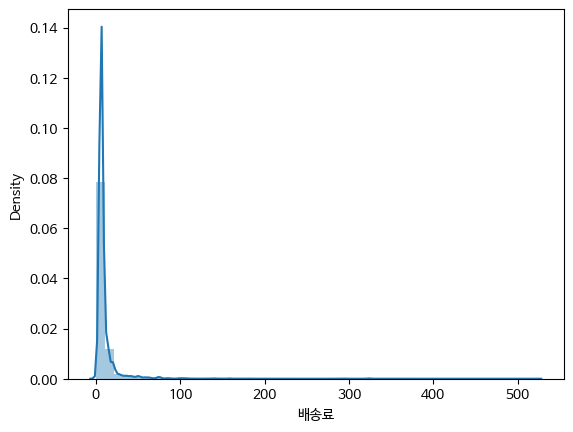

In [ ]:
# 배송료 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

%matplotlib inline
# plt.style.use(['dark_background'])

sns.distplot(df_o['배송료']);

In [ ]:
temp = df_o[df_o['배송료'] >= 100]
temp.head(10)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
26,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used
27,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked
28,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked
29,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked
30,USER_0066,Transaction_0009,2019-01-01,Product_1142,Notebooks & Journals,26,7.93,102.79,Not Used
317,USER_0284,Transaction_0176,2019-01-03,Product_0942,Office,62,2.00,122.74,Clicked
318,USER_0867,Transaction_0176,2019-01-03,Product_0956,Notebooks & Journals,62,15.96,122.74,Used
324,USER_0867,Transaction_0180,2019-01-03,Product_0177,Bottles,62,2.39,210.44,Clicked
325,USER_0867,Transaction_0180,2019-01-03,Product_0848,Bags,12,13.19,210.44,Clicked
326,USER_0867,Transaction_0180,2019-01-03,Product_0854,Bags,62,3.98,210.44,Clicked


```
거래 ID의 거래 수량 등의 영향을 받아 배송료가 늘어나는 것으로 보이며, 이상치가 아닌 것으로 판단됩니다.
```

2. Customer_info

In [ ]:
df_c.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
# Data shape
print('df_c', df_c.shape)  # 1,468 rows, 4 cols

df_c (1468, 4)


In [ ]:
# Data type
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [ ]:
# Null 확인
print(df_c.isnull().sum())

고객ID    0
성별      0
고객지역    0
가입기간    0
dtype: int64


In [ ]:
# Outlier 확인
df_c.describe()

,가입기간
count,1468.000000
mean,25.912125
std,13.959667
min,2.000000
25%,14.000000
50%,26.000000
75%,38.000000
max,50.000000


3. DIscount_info

In [ ]:
df_d.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
# Data shape
print('df_d', df_d.shape)  # 204 rows, 4 cols

df_d (204, 4)


In [ ]:
# Data type
df_d.info()  # non-null 수가 row수와 일치하므로 null 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
# outlier 확인
df_d.describe()

,할인율
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


4. Tax_info

In [ ]:
df_t.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
# Data shape
print('df_t', df_t.shape)  # 20 rows, 2 cols

df_t (20, 2)


In [ ]:
# Data type
df_t.info()  # non-null 수가 row수와 일치하므로 null 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
# Outlier 확인
df_t.describe()

,GST
count,20.000000
mean,0.116500
std,0.052443
min,0.050000
25%,0.087500
50%,0.100000
75%,0.180000
max,0.180000


### · EDA
---
- 데이터 수집 기간 : 2019년 1월 1일 ~ 2019년 12월 31일
- 수집 기간 동안 거래기록이 있는 고객 수 : 1468명
- 구매 금액 = 수량 * 평균금액 * (1-쿠폰할인율) * (1+부가가치세율)   
  (쿠폰이 적용되지 않은 경우에는 쿠폰 할인율 0%)
- 2019년 기준 11월, 12월의 구매금액이 높은 편이고 5월, 6월의 구매금액이 상대적으로 낮습니다.  
- 대부분의 고객의 구매 주기가 2주 이내로 확인되었습니다.
- 성별 이용 비율은 여성이 63.6%, 남성이 36.4%로 여성의 비율이 약 1.7배 높습니다.


In [ ]:
df_o.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
# 거래 데이터 수집 기간 확인
df_o['거래날짜'].min(), df_o['거래날짜'].max()

('2019-01-01', '2019-12-31')

In [ ]:
# 해당 기간동안 구매 서비스를 이용한 고객 수
df_o['고객ID'].nunique()

1468

In [ ]:
# 수집 기간동안 발생한 총 거래 수 -> 고객 ID가 달라도 거래 ID가 같은 경우가 존재하므로 고객별 거래 ID 수를 구한 후 이를 합하여 전체 거래 수 구해줌
temp = pd.DataFrame(df_o.groupby('고객ID')['거래ID'].nunique())
temp['거래ID'].sum()

26631


 구매 금액 확인  


In [ ]:
# discount와 join하기 위해 날짜 전처리
dfo = df_o.copy()
dfo['거래날짜'] = pd.to_datetime(dfo['거래날짜'])

# 날짜에서 월 데이터 추출
dfo['월'] = dfo['거래날짜'].dt.strftime('%b')

# 온라인 거래기록, 쿠폰 할인 정보 Join
dfd = df_d.copy()
df_od = pd.merge(left = dfo, right = dfd, how = 'left', on = ['월', '제품카테고리'])

# 부가가치세 적용을 위해 Tax와 Join
dft = df_t.copy()
df_odt = pd.merge(left = df_od, right= dft, how = 'left', on = '제품카테고리')

In [ ]:
# Join한 데이터 확인 - null값이 존재하는 것으로 보임
df_odt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   거래ID    52924 non-null  object        
 2   거래날짜    52924 non-null  datetime64[ns]
 3   제품ID    52924 non-null  object        
 4   제품카테고리  52924 non-null  object        
 5   수량      52924 non-null  int64         
 6   평균금액    52924 non-null  float64       
 7   배송료     52924 non-null  float64       
 8   쿠폰상태    52924 non-null  object        
 9   월       52924 non-null  object        
 10  쿠폰코드    52524 non-null  object        
 11  할인율     52524 non-null  float64       
 12  GST     52924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 5.2+ MB


In [ ]:
# null값 확인
print(df_odt.isnull().sum())

고객ID        0
거래ID        0
거래날짜        0
제품ID        0
제품카테고리      0
수량          0
평균금액        0
배송료         0
쿠폰상태        0
월           0
쿠폰코드      400
할인율       400
GST         0
dtype: int64


In [ ]:
# null인 데이터 확인
df_odt[df_odt['쿠폰코드'].isnull()]

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,Jan,NaN,NaN,0.18
95,USER_0585,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,Jan,NaN,NaN,0.10
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,Jan,NaN,NaN,0.18
178,USER_0906,Transaction_0095,2019-01-02,Product_0196,Fun,2,7.42,6.50,Not Used,Jan,NaN,NaN,0.18
193,USER_0954,Transaction_0105,2019-01-02,Product_0886,Google,1,11.54,17.96,Clicked,Jan,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,USER_0034,Transaction_19979,2019-10-30,Product_0863,Backpacks,1,79.99,6.00,Clicked,Oct,NaN,NaN,0.10
45167,USER_0643,Transaction_20483,2019-11-07,Product_0863,Backpacks,1,79.99,6.00,Not Used,Nov,NaN,NaN,0.10
45807,USER_1435,Transaction_20841,2019-11-12,Product_0863,Backpacks,1,99.99,6.00,Clicked,Nov,NaN,NaN,0.10
46239,USER_1174,Transaction_21068,2019-11-15,Product_0863,Backpacks,1,79.99,6.00,Used,Nov,NaN,NaN,0.10


In [ ]:
# 쿠폰코드가 없는 제품에 대해서 쿠폰코드는 NoDC, 할인율을 0으로 대체
df_odt.loc[df_odt['쿠폰코드'] != df_odt['쿠폰코드'], '쿠폰코드'] = 'NoDC'
df_odt.loc[df_odt['할인율'] != df_odt['할인율'], '할인율'] = 0

print(df_odt.isnull().sum())


고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
월         0
쿠폰코드      0
할인율       0
GST       0
dtype: int64


In [ ]:
# 구매금액 추가
import numpy as np
total_sales_dc = (df_odt['수량'] * df_odt['평균금액'] * (100 - df_odt['할인율']) / 100) * (1+df_odt['GST'])
total_sales = (df_odt['수량'] * df_odt['평균금액']) * (1+df_odt['GST'])
df_odt['구매금액'] = np.where(df_odt['쿠폰상태']=='Used', total_sales_dc, total_sales)

df_odt.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,17.5230


In [ ]:
df_odt.shape

(52924, 14)

월별 이용 데이터 확인

In [ ]:
df_odt.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,17.5230


In [ ]:
# 월별 고객 이용 현황
df_odt_c = df_odt.copy()
df_odt_c['거래연월'] = df_odt_c["거래날짜"].dt.strftime("%Y-%m")
df_odt_c.head(5)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,거래연월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729,2019-01
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,152.1729,2019-01
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,2.0295,2019-01
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,103.4270,2019-01
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,17.5230,2019-01


In [ ]:
df_m_cus = df_odt_c.groupby('거래연월',as_index=False)['고객ID'].nunique()
df_m_cus.tail(5)

,거래연월,고객ID
7,2019-08,300
8,2019-09,193
9,2019-10,210
10,2019-11,188
11,2019-12,236


In [ ]:
# 월별 거래수
df_m_cnt = pd.DataFrame(df_odt_c.groupby(['거래연월', '고객ID'])['거래ID'].nunique().reset_index(name = '거래수'))
df_m_cnt = pd.DataFrame(df_m_cnt.groupby(['거래연월'])['거래수'].sum())
df_m_cnt

,거래수
거래연월,
2019-01,2231
2019-02,1719
2019-03,2120
2019-04,1963
2019-05,2160
2019-06,2091
2019-07,2266
2019-08,2640
2019-09,2055


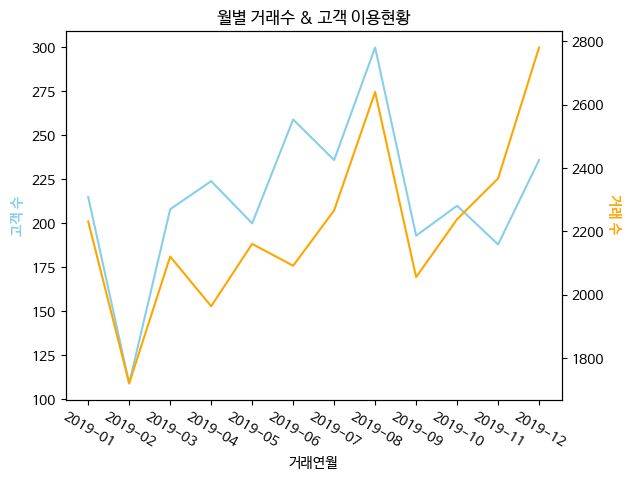

In [ ]:
# 월별 거래수,  고객 이용현황 시각화
ax1 = sns.lineplot(data = df_m_cus, x = df_m_cus['거래연월'], y = df_m_cus['고객ID'], color = 'skyblue')
ax1.set_ylabel('고객 수', color = 'skyblue', weight = 'bold')
plt.xticks(rotation = -30)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_m_cnt, x = df_m_cnt.index, y =  df_m_cnt['거래수'], color = 'orange')
ax2.set_ylabel('거래 수 ', rotation = -90, labelpad = 13.0, color = 'orange', weight = 'bold')

plt.title('월별 거래수 & 고객 이용현황')
plt.show()

```
2019 년 2월 잠시 주춤했으나 3월부터 회복세를 보여 이용자 수가 8월에 가장 높았다가 잠시 하락 후 다시 오르고 있는 추세입니다.
거래 수는 월별 이용고객 추세와 비슷한 경향을 보입니다.
```

In [ ]:
# 월별 구매금액
monthly_sales = pd.DataFrame(df_odt.groupby('월')['구매금액'].sum())

idx = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = monthly_sales.reindex(idx)

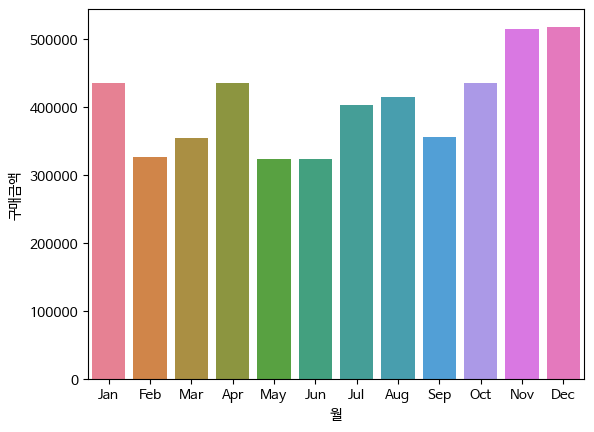

In [ ]:
# 월별 판매금액 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

%matplotlib inline
# plt.style.use(['dark_background'])

sns.barplot(monthly_sales, x = monthly_sales.index, y = '구매금액', hue = '월');

```
블랙 프라이데이, 크리스마스 등 다양한 구매 이벤트가 있는 11월, 12월의 구매 금액이 높은 것으로 나타났습니다.
그에 비해 5월, 6월의 매출이 다른 달에 비해 낮은 것으로 보입니다.

```

In [ ]:
# 제품카테고리별 구매금액 확인
pd.options.display.float_format = '{:.2f}'.format  # 지수 표현을 실수 표현으로 변경
cat_sales = pd.DataFrame(df_odt.groupby('제품카테고리')['구매금액'].sum())
cat_sales.sort_values(by = '구매금액', ascending = False, inplace = True)
cat_sales

,구매금액
제품카테고리,
Nest-USA,2622005.70
Apparel,650964.77
Nest,504570.87
Office,283497.36
Drinkware,222493.78
Bags,167981.56
Notebooks & Journals,106610.16
Lifestyle,82039.84
Nest-Canada,73342.81


```
Nest-USA 제품의 구매금액이 가장 놓은 것을 알 수 있습니다.
다음으로는 의복계열, Nest 제품, 사무용품 계열의 구매 금액이 높습니다.
```

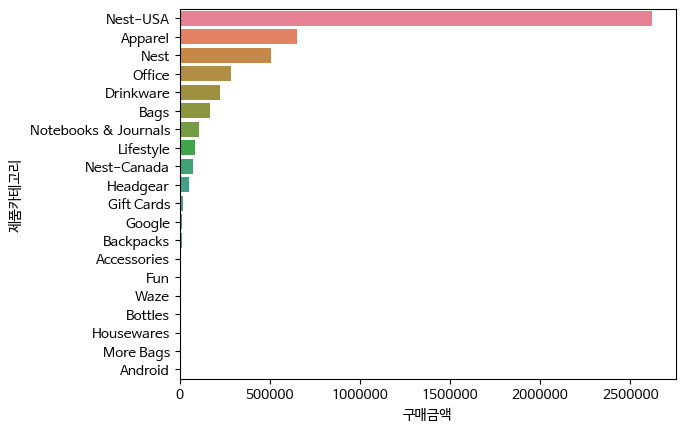

In [ ]:
# 시각화
ax = sns.barplot(cat_sales, x = '구매금액', y = '제품카테고리', hue = '제품카테고리')
ax.get_xaxis().get_major_formatter().set_scientific(False);

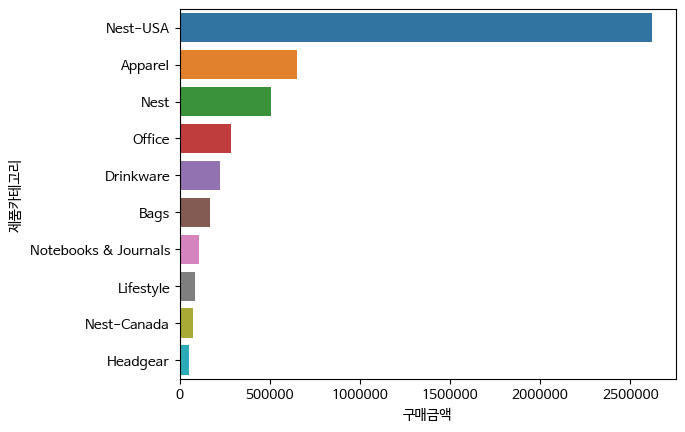

In [ ]:
# 카테고리 구분하여 시각화
cat_sales_top10 = cat_sales.iloc[:10]

ax = sns.barplot(cat_sales_top10, x = '구매금액', y = '제품카테고리', hue = '제품카테고리')
ax.get_xaxis().get_major_formatter().set_scientific(False);

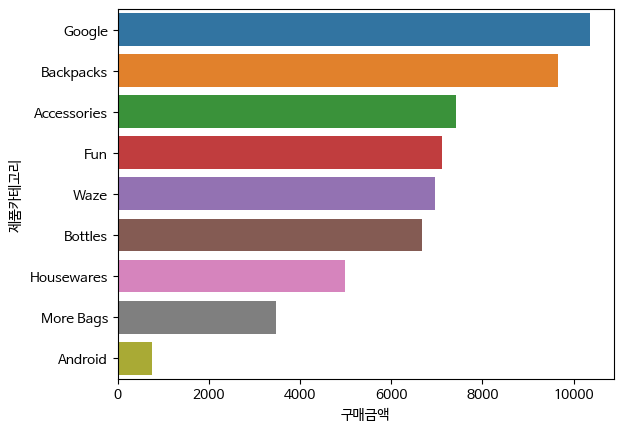

In [ ]:
cat_sales_bottom10 = cat_sales.iloc[11:]
sns.barplot(cat_sales_bottom10, x = '구매금액', y = '제품카테고리', hue = '제품카테고리');

2019년 이용 고객의 거래 주기 구하기
- 분석대상 : 2019년 첫거래일 이후 1일이 지난 시점부터 거래 기록이 있는 고객
- 거래 주기 = (마지막거래일 - 첫거래일) / (거래수 - 1)
- 거래 주기 분석을 위한 새로운 데이터프레임 생성  
  stat_df 설명
  

  |Column|Description|
  |:---|:---|
  |고객ID|고객 고유 ID|
  |첫거래일|첫 거래날짜|
  |마지막거래일|마지막 거래날짜|
  |거래수|거래 횟수|
  |구매금액|거래 기간동안 총 구매금액|

In [ ]:
df_odt.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03


In [ ]:
# 거래 주기를 구하기 위한 데이터프레임 작성
stat_df = pd.DataFrame(df_odt.groupby('고객ID').agg({'거래날짜' : ['min', 'max'], '거래ID' : 'nunique', '구매금액' : 'sum'}))

# 컬럼명 재지정
stat_df.columns = ['첫거래일', '마지막거래일', '거래수', '구매금액']
stat_df.reset_index(inplace = True)

In [ ]:
# 데이터 복사 후 거래 주기 대상 추출
stat_c = stat_df.copy()
stat_c = stat_c[(stat_c['마지막거래일'] - stat_c['첫거래일']).dt.days > 1]

# 거래수가 2 이상인 경우만 추출
stat_c = stat_c[stat_c['거래수'] >= 2]

In [ ]:
# 거래주기 확인
stat_c['diff'] = (stat_c['마지막거래일'] - stat_c['첫거래일'])
stat_c['cycle'] = stat_c['diff'] / (stat_c['거래수'] - 1)
stat_c['cycle_days'] = stat_c['cycle'].dt.days

stat_c.sort_values(by = 'cycle', inplace = True)

stat_c = stat_c[stat_c['diff'] != '0 days']

In [ ]:
# 거래 주기 기술통계량 확인
stat_c['cycle_days'].describe()

count   617.00
mean     12.21
std      19.47
min       0.00
25%       3.00
50%       6.00
75%      14.00
max     172.00
Name: cycle_days, dtype: float64

```
거래 주기 평군값은 약 12일, 중앙값은 6일로 주로 구매주기가 2주 이내인 고객들이 많았음을 알 수 있습니다.
```

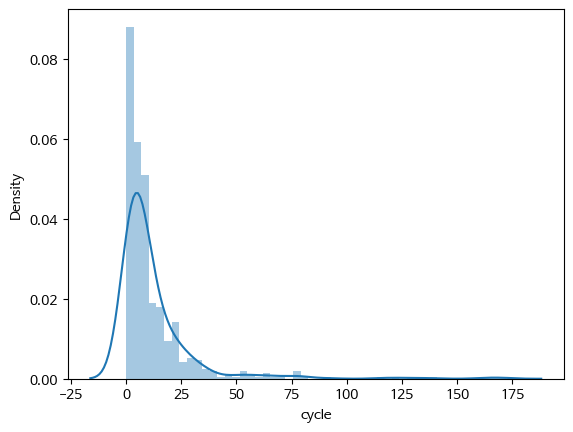

In [ ]:
# cycle 분포
ax = sns.distplot(stat_c['cycle'].dt.days)
ax.get_xaxis().get_major_formatter().set_scientific(False);

In [ ]:
df_odt.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52


In [ ]:
# 고객ID, 거래ID별 구매금액, 배송료 구하기
gp1 = pd.DataFrame(df_odt.groupby(['고객ID', '거래ID']).agg({'구매금액' : 'sum', '배송료' : 'mean'}))
gp1 = gp1.reset_index()
gp1

,고객ID,거래ID,구매금액,배송료
0,USER_0000,Transaction_16900,24.98,75.00
1,USER_0001,Transaction_20178,12.48,20.85
2,USER_0001,Transaction_20179,21.66,6.00
3,USER_0001,Transaction_20180,163.90,6.00
4,USER_0001,Transaction_20181,163.90,6.00
...,...,...,...,...
26626,USER_1467,Transaction_18634,103.95,6.00
26627,USER_1467,Transaction_18635,39.11,6.00
26628,USER_1467,Transaction_18636,25.47,6.50
26629,USER_1467,Transaction_18637,52.02,6.00


Customer_info 이용

In [ ]:
df_o.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used


In [ ]:
# Customer_info와 Join
df_oc = pd.merge(left = df_o, right = df_c, how = 'left', on = '고객ID')

# 이용 고객의 성별 분포 확인
gp_s = pd.DataFrame(df_oc.groupby('성별')['고객ID'].nunique().reset_index(name = '고객수'))
gp_s

,성별,고객수
0,남,534
1,여,934


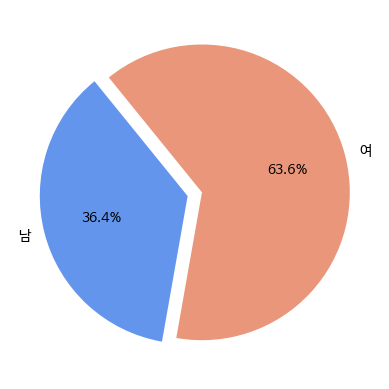

In [ ]:
import matplotlib.pyplot as plt

ratio = [534/1468, 934/1468]
labels = ['남', '여']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
여성이 63.6%, 남성이 36.4%로 여성의 비율이 약 1.7배 높습니다.
```

In [ ]:
# 이용 고객의 지역 분포 확인
gp_r = pd.DataFrame(df_oc.groupby('고객지역')['고객ID'].nunique().reset_index(name = '고객수'))

gp_r.sort_values(by = '고객수', ascending = False, inplace = True)
gp_r

,고객지역,고객수
0,California,464
1,Chicago,456
3,New York,324
2,New Jersey,149
4,Washington DC,75


In [ ]:
# 가입기간별 고객 수 분포
# 이용 고객의 지역 분포 확인

gp_p = pd.DataFrame(df_oc.groupby('가입기간')['고객ID'].nunique().reset_index(name = '고객수'))

gp_p

,가입기간,고객수
0,2,26
1,3,23
2,4,38
3,5,30
4,6,36
5,7,31
6,8,28
7,9,28
8,10,34
9,11,25


## 🔉**Process 2**

### · RFM Segmentation
---

R, F, M 기준 설정

R(Recency) score : 고객이 얼마나 최근에 구매했는가?  
* 현재가 2020년 1월 1일로 가정하고 현재 기준으로 최근 구매일이 얼마나 오래전인지를 확인

F(Frequency) score : 고객이 얼마나 자주 구매했는가?  
* 거래 횟수 산정 기준 : 고객 ID당 고유 거래 ID 수

M(Monetary) score : 고객이 얼마나 많은 금액을 지불했는가?
* 구매 금액 : 구매 금액 = 수량 * 평균금액 * (1-쿠폰할인율) * (1+부가가치세율)   
  (쿠폰이 적용되지 않은 경우에는 쿠폰 할인율 0%)
* 배송료는 포함하지 않았습니다.

In [ ]:
# R, F, M 확인을 위해 이용할 데이터프레임 확인
df_odt.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52


Recency : 2020년 1월 1일 기준으로 2019년 마지막 거래일이 얼마나 지났는지

In [ ]:
# 각 고객의 2019년 마지막 거래날짜
r = pd.DataFrame(df_odt.groupby('고객ID')['거래날짜'].max().reset_index(name = '마지막거래일'))
r.sort_values(by = '마지막거래일', ascending = False, inplace = True)

r.head()

,고객ID,마지막거래일
513,USER_0513,2019-12-31
563,USER_0563,2019-12-31
562,USER_0562,2019-12-31
504,USER_0504,2019-12-31
167,USER_0167,2019-12-31


In [ ]:
# 현재(2020년 1월 1일 기준으로 Recency 확인)
from datetime import datetime
s_date = datetime(2020, 1, 1)
r['Recency'] = (s_date - r['마지막거래일']).dt.days
r.head()

,고객ID,마지막거래일,Recency
513,USER_0513,2019-12-31,1
563,USER_0563,2019-12-31,1
562,USER_0562,2019-12-31,1
504,USER_0504,2019-12-31,1
167,USER_0167,2019-12-31,1


Frequency : 고객 ID 당 거래가 얼마나 이루어졌는지 (거래 ID 기준)

In [ ]:
f = pd.DataFrame(df_odt.groupby('고객ID')['거래ID'].nunique().reset_index(name = 'Frequency'))
f.head()

,고객ID,Frequency
0,USER_0000,1
1,USER_0001,31
2,USER_0002,8
3,USER_0003,11
4,USER_0004,13


Monetary : 구매 금액이 얼마나 되는지

In [ ]:
# 구매 금액에 이용할 데이터
gp1.head()

,고객ID,거래ID,구매금액,배송료
0,USER_0000,Transaction_16900,24.98,75.00
1,USER_0001,Transaction_20178,12.48,20.85
2,USER_0001,Transaction_20179,21.66,6.00
3,USER_0001,Transaction_20180,163.90,6.00
4,USER_0001,Transaction_20181,163.90,6.00


In [ ]:
m = pd.DataFrame(gp1.groupby('고객ID')['구매금액'].sum().reset_index(name = 'Monetary'))

m.head()

,고객ID,Monetary
0,USER_0000,24.98
1,USER_0001,15021.70
2,USER_0002,1492.41
3,USER_0003,1339.56
4,USER_0004,1369.94


In [ ]:
temp = pd.merge(left = r, right = f, how = 'left', on = '고객ID')
rfm = pd.merge(left = temp, right = m, how = 'left', on = '고객ID')
rfm.drop('마지막거래일', axis = 'columns', inplace = True)
rfm.head()

,고객ID,Recency,Frequency,Monetary
0,USER_0513,1,5,491.43
1,USER_0563,1,289,59096.83
2,USER_0562,1,2,797.15
3,USER_0504,1,6,1131.14
4,USER_0167,1,14,3150.17


#### · RFM 점수 산정
---
  - Recency, Frequency, Monetary를 4분위수로 나누어 점수를 산정
  - Recency는 낮을수록, Frequency, Monetary는 높을수록 높은 점수로 산정
  - R
    - 0 ~ 25% : 4 / 26 ~ 50% : 3 / 51 ~ 75% : 2 / 76 ~ 100% : 1
  - F, M
    - 0 ~ 25% : 1 / 26 ~ 50% : 2 / 51 ~ 75% : 3 / 76 ~ 100% : 4

  




R : 2020년 1월 1일 기준으로 최근 구매일이 얼마나 오래 전인지  
F : 거래 ID를 기준으로 거래 횟수 산정  
M : 배송료를 포함하지 않은 거래 금액

In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,1468.00,1468.00,1468.00
mean,145.29,18.14,3297.50
std,101.94,24.98,5300.08
min,1.00,1.00,0.99
25%,56.00,5.00,673.30
50%,132.00,11.00,1796.66
75%,221.00,23.00,4078.97
max,365.00,328.00,82073.78


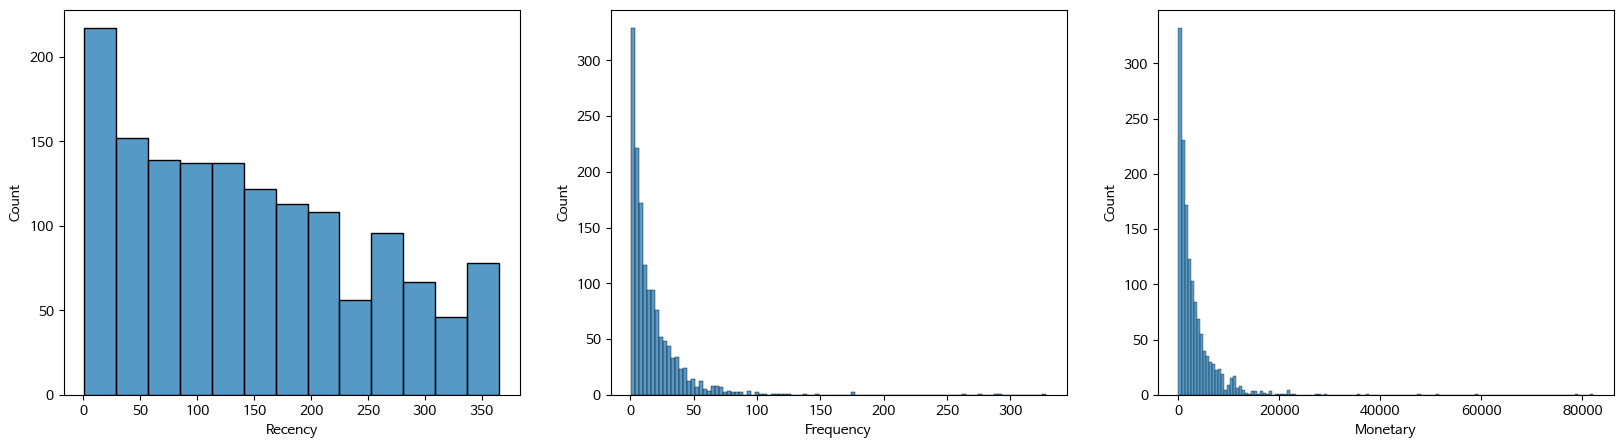

In [ ]:
# Recency, Frequency, Monetary 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 3, figsize = (20, 5))

sns.histplot(rfm['Recency'], ax = ax[0])
sns.histplot(rfm['Frequency'], ax = ax[1])
sns.histplot(rfm['Monetary'], ax = ax[2]);

```
Recency에 비해 Frequency, Monetary는 특정 값 범위에 쏠려있는 것을 확인할 수 있습니다.
```

R, F, M 사분위수로 Scoring
- Recency는 낮을수록 높은 Scoring임을 유의  



In [ ]:
rfm_c = rfm.copy()
rfm_c.head()

,고객ID,Recency,Frequency,Monetary
0,USER_0513,1,5,491.43
1,USER_0563,1,289,59096.83
2,USER_0562,1,2,797.15
3,USER_0504,1,6,1131.14
4,USER_0167,1,14,3150.17


In [ ]:
# RFM Scoring
r_labels = range(4, 0, -1)
f_m_labels = range(1, 5)

r_score = pd.qcut(rfm_c['Recency'], q = 4, labels = r_labels)
f_score = pd.qcut(rfm_c['Frequency'], q = 4, labels = f_m_labels)
m_score = pd.qcut(rfm_c['Monetary'], q = 4, labels = f_m_labels)

rfm_score = rfm_c.assign(R = r_score, F = f_score, M = m_score)
rfm_score[['R', 'F', 'M']] = rfm_score[['R', 'F', 'M']].apply(pd.to_numeric)

rfm_score['RFM_Score'] = rfm_score[['R', 'F', 'M']].sum(axis = 1)
rfm_score

,고객ID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,USER_0513,1,5,491.43,4,1,1,6
1,USER_0563,1,289,59096.83,4,4,4,12
2,USER_0562,1,2,797.15,4,1,2,7
3,USER_0504,1,6,1131.14,4,2,2,8
4,USER_0167,1,14,3150.17,4,3,3,10
...,...,...,...,...,...,...,...,...
1463,USER_0922,364,5,910.13,1,1,2,4
1464,USER_1249,364,5,605.05,1,1,1,3
1465,USER_1421,364,12,1969.79,1,3,3,7
1466,USER_0954,364,8,2132.89,1,2,3,6


In [ ]:
rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1468 non-null   object 
 1   Recency    1468 non-null   int64  
 2   Frequency  1468 non-null   int64  
 3   Monetary   1468 non-null   float64
 4   R          1468 non-null   int64  
 5   F          1468 non-null   int64  
 6   M          1468 non-null   int64  
 7   RFM_Score  1468 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 91.9+ KB


In [ ]:
rfm_score.describe()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
count,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00
mean,145.29,18.14,3297.50,2.51,2.44,2.50,7.45
std,101.94,24.98,5300.08,1.12,1.15,1.12,2.74
min,1.00,1.00,0.99,1.00,1.00,1.00,3.00
25%,56.00,5.00,673.30,2.00,1.00,1.75,5.00
50%,132.00,11.00,1796.66,3.00,2.00,2.50,7.00
75%,221.00,23.00,4078.97,4.00,3.00,3.25,10.00
max,365.00,328.00,82073.78,4.00,4.00,4.00,12.00


In [ ]:
# Total_Score별 회원 수 분포 확인
total_gp = pd.DataFrame(rfm_score.groupby('RFM_Score')['고객ID'].nunique().reset_index(name = '고객수'))

total_gp

,RFM_Score,고객수
0,3,113
1,4,149
2,5,163
3,6,170
4,7,162
5,8,149
6,9,154
7,10,156
8,11,127
9,12,125


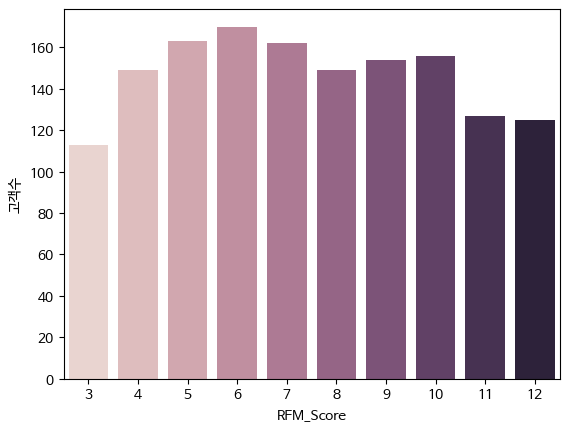

In [ ]:
# 시각화
ax = sns.barplot(data = total_gp, x = 'RFM_Score', y = '고객수', hue = 'RFM_Score', legend = False);

####  · 클러스터링
---
- K-means 알고리즘을 이용하여 군집화를 진행하였습니다.

In [ ]:
rfm_sc = rfm_score[['R', 'F', 'M']]
rfm_sc.describe()

,R,F,M
count,1468.00,1468.00,1468.00
mean,2.51,2.44,2.50
std,1.12,1.15,1.12
min,1.00,1.00,1.00
25%,2.00,1.00,1.75
50%,3.00,2.00,2.50
75%,4.00,3.00,3.25
max,4.00,4.00,4.00


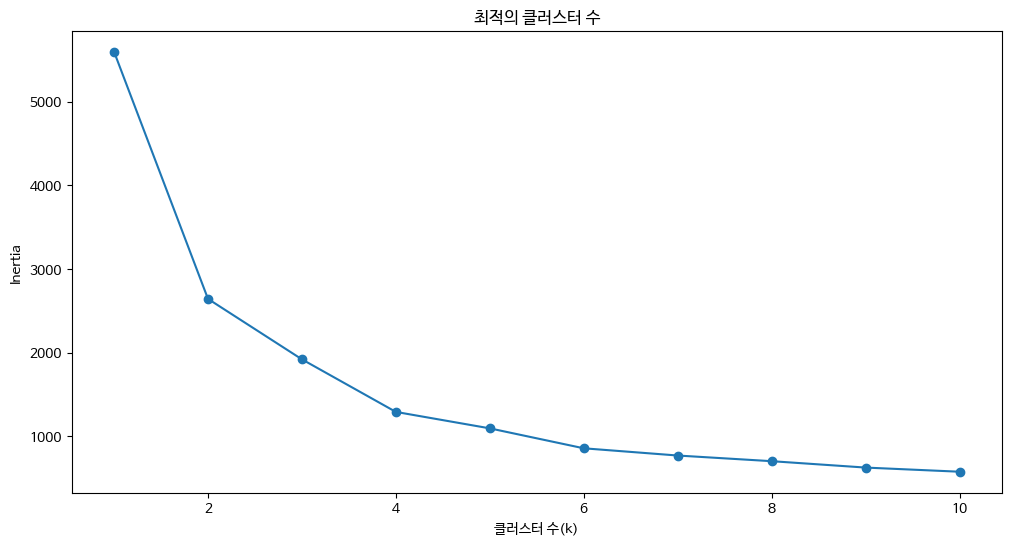

In [ ]:
# 같은 스케일로 점수를 산정하였기 때문에 스케일링 없이 군집화 진행
# k값 결정
from sklearn.cluster import KMeans

k_list = range(1, 11)
inertia_list = []

for k in k_list:
  k_cluster = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, random_state = 42)
  k_cluster.fit(rfm_sc)
  inertia_list.append(k_cluster.inertia_)


# k값 결정을 위한 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# plt.style.use(['dark_background'])
plt.plot(k_list, inertia_list, '-o')
plt.xlabel('클러스터 수(k)')
plt.ylabel('Inertia')
plt.title('최적의 클러스터 수')
plt.show()

```
클러스터 수는 4개가 적절한 것으로 보입니다.
```

In [ ]:
# 클러스터링 수행
cluster = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 123)
cluster.fit(rfm_sc)

# 군집 Label 컬럼 생성
cluster_labels = cluster.labels_

rfm_k4 = rfm_score.assign(K_cluster = cluster_labels)

rfm_k4

,고객ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,K_cluster
0,USER_0513,1,5,491.43,4,1,1,6,2
1,USER_0563,1,289,59096.83,4,4,4,12,1
2,USER_0562,1,2,797.15,4,1,2,7,2
3,USER_0504,1,6,1131.14,4,2,2,8,2
4,USER_0167,1,14,3150.17,4,3,3,10,1
...,...,...,...,...,...,...,...,...,...
1463,USER_0922,364,5,910.13,1,1,2,4,0
1464,USER_1249,364,5,605.05,1,1,1,3,0
1465,USER_1421,364,12,1969.79,1,3,3,7,3
1466,USER_0954,364,8,2132.89,1,2,3,6,3


In [ ]:
# 실루엣 계수 확인
from sklearn.metrics import silhouette_score, silhouette_samples
print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(rfm_sc, cluster_labels)))


실루엣 스코어 : 0.443


In [ ]:
# segment별 실루엣 계수 확인
from sklearn.metrics import silhouette_score, silhouette_samples
rfm_sil = rfm_k4.copy()

rfm_sil['silhouette_coeff'] = silhouette_samples(rfm_sc, rfm_sil['K_cluster'])  # 실루엣 계수 칼럼 추가
rfm_sil.groupby('K_cluster')['silhouette_coeff'].mean()

K_cluster
0   0.49
1   0.52
2   0.36
3   0.37
Name: silhouette_coeff, dtype: float64

```
cluster 0, 1에 비해 2와 3의 실루엣 계수 평균값이 상대적으로 낮습니다.
```

In [ ]:
# 클러스터별 R,F,M 값 확인
rfm_k4.groupby('K_cluster').agg({'R' : ['min', 'max', 'mean'],
                                  'F' : ['min', 'max', 'mean'],
                                  'M' : ['min', 'max', 'mean'],
                                  'RFM_Score' : ['min', 'max', 'mean']})

R            F            M          RFM_Score          
          min max mean min max mean min max mean       min max  mean
K_cluster                                                           
0           1   2 1.47   1   2 1.37   1   3 1.43         3   6  4.27
1           3   4 3.57   3   4 3.60   3   4 3.60         9  12 10.77
2           3   4 3.41   1   3 1.61   1   3 1.76         5   9  6.78
3           1   2 1.53   1   4 3.26   2   4 3.29         6  10  8.08

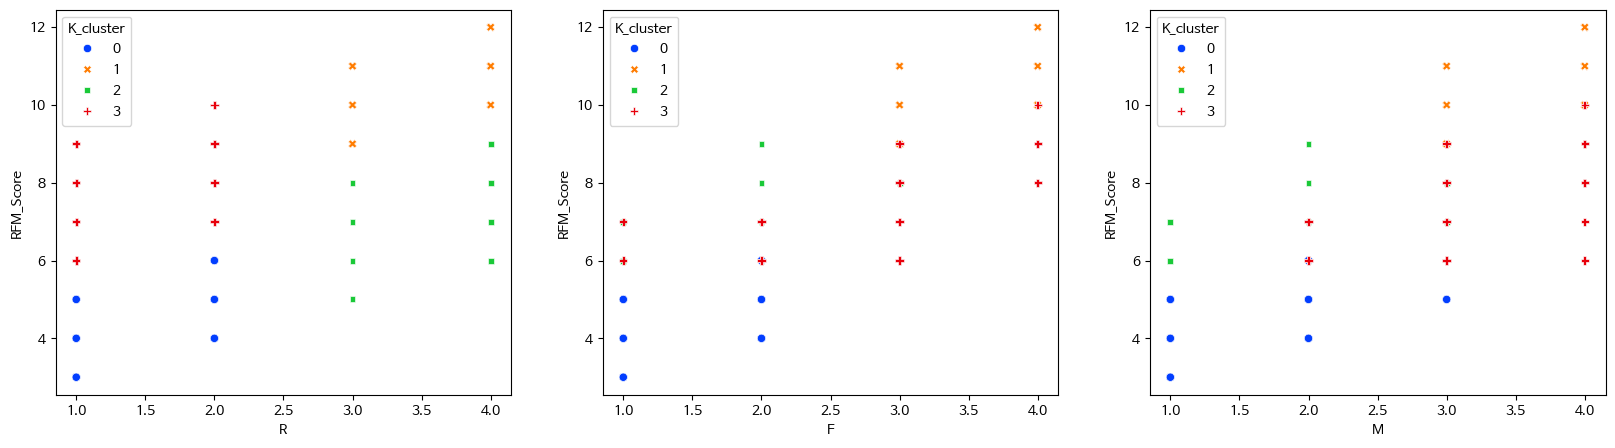

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (20, 5))

sns.scatterplot(data = rfm_k4, x = 'R', y = 'RFM_Score', hue = 'K_cluster', style = 'K_cluster', palette = 'bright',  ax = ax[0])
sns.scatterplot(data = rfm_k4, x = 'F', y = 'RFM_Score', hue = 'K_cluster', style = 'K_cluster', palette = 'bright',  ax = ax[1])
sns.scatterplot(data = rfm_k4, x = 'M', y = 'RFM_Score', hue = 'K_cluster', style = 'K_cluster', palette = 'bright',  ax = ax[2]);

```
cluster 2,와 3의 실루엣 계수가 다소 낮지만 cluster 0과 1의 특징이 뚜렷하게 나타나고 각 클러스터의 R, F, M 을 비교해보았을 때
구분할 수 있는 기준이 있다고 판단되어 해당 클러스터링으로 분석을 진행하겠습니다.
```

```
cluster 1 (Loyal) : 우수 고객 (구매 금액이 높고, 자주 방문하며 최근에도 방문한 고객)
cluster 3 (Enthusiast) : 휴면 가능성이 있는 잠재 우수 고객 (구매금액은 다소 높지만 구매 빈도가 Loyal에 비해 낮고, 방문한 지 기간이 지난 고객)
cluster 2 (Potential) : 잡아야 할 고객 (최근에 방문했지만 구매 빈도나 구매 금액이 다소 낮은 고객)
cluster 0 (Lost) : 이탈 우려 고객 (구매 금액, 구매 빈도가 낮고 최근에도 방문하지 않은 고객)
```

####  · 각 고객군별 구매 특징 확인

In [ ]:
# 클러스터별 고객 수 확인
cluster_gp = pd.DataFrame(rfm_k4.groupby('K_cluster')['고객ID'].nunique().reset_index(name = '고객수'))


cluster_gp = cluster_gp.reindex(index = [1, 3, 2, 0])
cluster_gp.reset_index(drop = True, inplace = True)
cluster_gp

,K_cluster,고객수
0,1,416
1,3,303
2,2,325
3,0,424


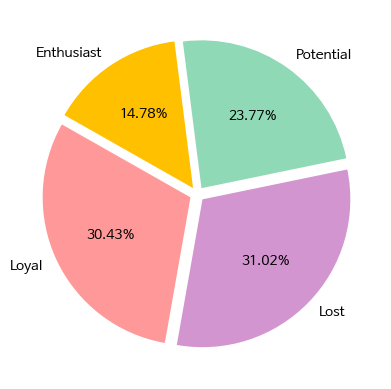

In [ ]:
# 클러스터별 고객 수 시각화
import matplotlib.pyplot as plt

ratio = [416/1468, 202/1468, 325/1468, 424/1468]
labels = ['Loyal', 'Enthusiast', 'Potential', 'Lost']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()


```
이탈 우려 고객 이 근소한 차이로 가장 많고 그 다음 우수 고객의 비율이 높습니다.
이탈 우려 고객의 수를 줄이고, 우수 고객의 비율을 높일 수 있는 마케팅 방안을 마련하고자 합니다.

```

In [ ]:
# 기존 구매고객 구매금액을 구해놓은 데이터에 고객 정보 데이터 Join
df_odtc = pd.merge(left = df_odt, right = df_c, how = 'left', on = '고객ID')

df_odtc.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,남,Chicago,12


In [ ]:
# 가입 기간 구분 컬럼 추가

df_odtc['가입기간_년'] = np.where(df_odtc['가입기간']<=12, '1년 이하',
                           np.where(df_odtc['가입기간']<=24, '1년 초과 2년 이하',
                                    np.where(df_odtc['가입기간']<=36, '2년 초과 3년 이하',
                                             np.where(df_odtc['가입기간']<=48, '3년 초과 4년 이하', '4년 초과'))))
df_odtc.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12,1년 이하
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12,1년 이하
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,남,Chicago,12,1년 이하
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,남,Chicago,12,1년 이하
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,남,Chicago,12,1년 이하


In [ ]:
rfm_k4.head()

,고객ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,K_cluster
0,USER_0513,1,5,491.43,4,1,1,6,2
1,USER_0563,1,289,59096.83,4,4,4,12,1
2,USER_0562,1,2,797.15,4,1,2,7,2
3,USER_0504,1,6,1131.14,4,2,2,8,2
4,USER_0167,1,14,3150.17,4,3,3,10,1


In [ ]:
# 데이터 Join 진행
pd.set_option('display.max_columns', 100)

seg_df = pd.merge(left = df_odtc, right = rfm_k4, how = 'left', on = '고객ID')

seg_df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년,Recency,Frequency,Monetary,R,F,M,RFM_Score,K_cluster
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,3
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,3
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,3
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,3
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,3


In [ ]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   고객ID       52924 non-null  object        
 1   거래ID       52924 non-null  object        
 2   거래날짜       52924 non-null  datetime64[ns]
 3   제품ID       52924 non-null  object        
 4   제품카테고리     52924 non-null  object        
 5   수량         52924 non-null  int64         
 6   평균금액       52924 non-null  float64       
 7   배송료        52924 non-null  float64       
 8   쿠폰상태       52924 non-null  object        
 9   월          52924 non-null  object        
 10  쿠폰코드       52924 non-null  object        
 11  할인율        52924 non-null  float64       
 12  GST        52924 non-null  float64       
 13  구매금액       52924 non-null  float64       
 14  성별         52924 non-null  object        
 15  고객지역       52924 non-null  object        
 16  가입기간       52924 non-null  int64        

In [ ]:
# K_cluster 컬럼명 변경 및 등급명 변경
seg_df['K_cluster'] = np.where(seg_df['K_cluster']== 0, 'Lost',
                           np.where(seg_df['K_cluster']==1, 'Loyal',
                                    np.where(seg_df['K_cluster']==2, 'Potential', 'Enthusiast')))
seg_df.rename(columns = {'K_cluster' : '고객군'}, inplace = True)

seg_df.tail()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객군
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,30.00,0.10,133.43,여,New York,45,3년 초과 4년 이하,1,6,1131.14,4,2,2,8,Potential
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,Dec,SALE30,30.00,0.18,40.41,여,New York,45,3년 초과 4년 이하,1,6,1131.14,4,2,2,8,Potential
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,30.00,0.10,116.95,여,New York,45,3년 초과 4년 이하,1,6,1131.14,4,2,2,8,Potential
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,30.00,0.10,442.86,여,California,7,1년 이하,1,2,797.15,4,1,2,7,Potential
52923,USER_0562,Transaction_25060,2019-12-31,Product_0984,Nest-USA,4,80.52,19.99,Clicked,Dec,ELEC30,30.00,0.10,354.29,여,California,7,1년 이하,1,2,797.15,4,1,2,7,Potential


In [ ]:
# 월별 고객등급 이용비중 구하기 위한 데이터 프레임

seg_df['거래연월'] = seg_df["거래날짜"].dt.strftime("%Y-%m")
df_m_level= seg_df.groupby(['거래연월', '고객군'],as_index=False)['고객ID'].nunique()
df_m_level.head()

,거래연월,고객군,고객ID
0,2019-01,Enthusiast,65
1,2019-01,Lost,80
2,2019-01,Loyal,59
3,2019-01,Potential,11
4,2019-02,Enthusiast,39


In [ ]:
# 테이블 피봇 진행
df_level_pivot = pd.pivot_table(df_m_level,
                      index = '거래연월',
                      columns = '고객군',
                      values = '고객ID')

df_level_pivot.fillna(0, inplace=True)

df_level_pivot['총 점수'] = df_level_pivot['Enthusiast'] + df_level_pivot['Lost'] + df_level_pivot['Loyal'] + df_level_pivot['Potential']


df_level_pivot.iloc[:,0] = (df_level_pivot.iloc[:,0] / df_level_pivot['총 점수'])
df_level_pivot.iloc[:,1] = (df_level_pivot.iloc[:,1] / df_level_pivot['총 점수'])
df_level_pivot.iloc[:,2] = (df_level_pivot.iloc[:,2] / df_level_pivot['총 점수'])
df_level_pivot.iloc[:,3] = (df_level_pivot.iloc[:,3] / df_level_pivot['총 점수'])


df_level_pivot.drop(['총 점수'], axis=1, inplace=True)
df_level_pivot

고객군,Enthusiast,Lost,Loyal,Potential
거래연월,,,,
2019-01,0.30,0.37,0.27,0.05
2019-02,0.36,0.16,0.42,0.06
2019-03,0.27,0.32,0.35,0.06
2019-04,0.29,0.36,0.28,0.07
2019-05,0.31,0.24,0.36,0.08
2019-06,0.25,0.28,0.36,0.10
2019-07,0.24,0.31,0.39,0.06
2019-08,0.18,0.20,0.40,0.22
2019-09,0.00,0.00,0.58,0.42


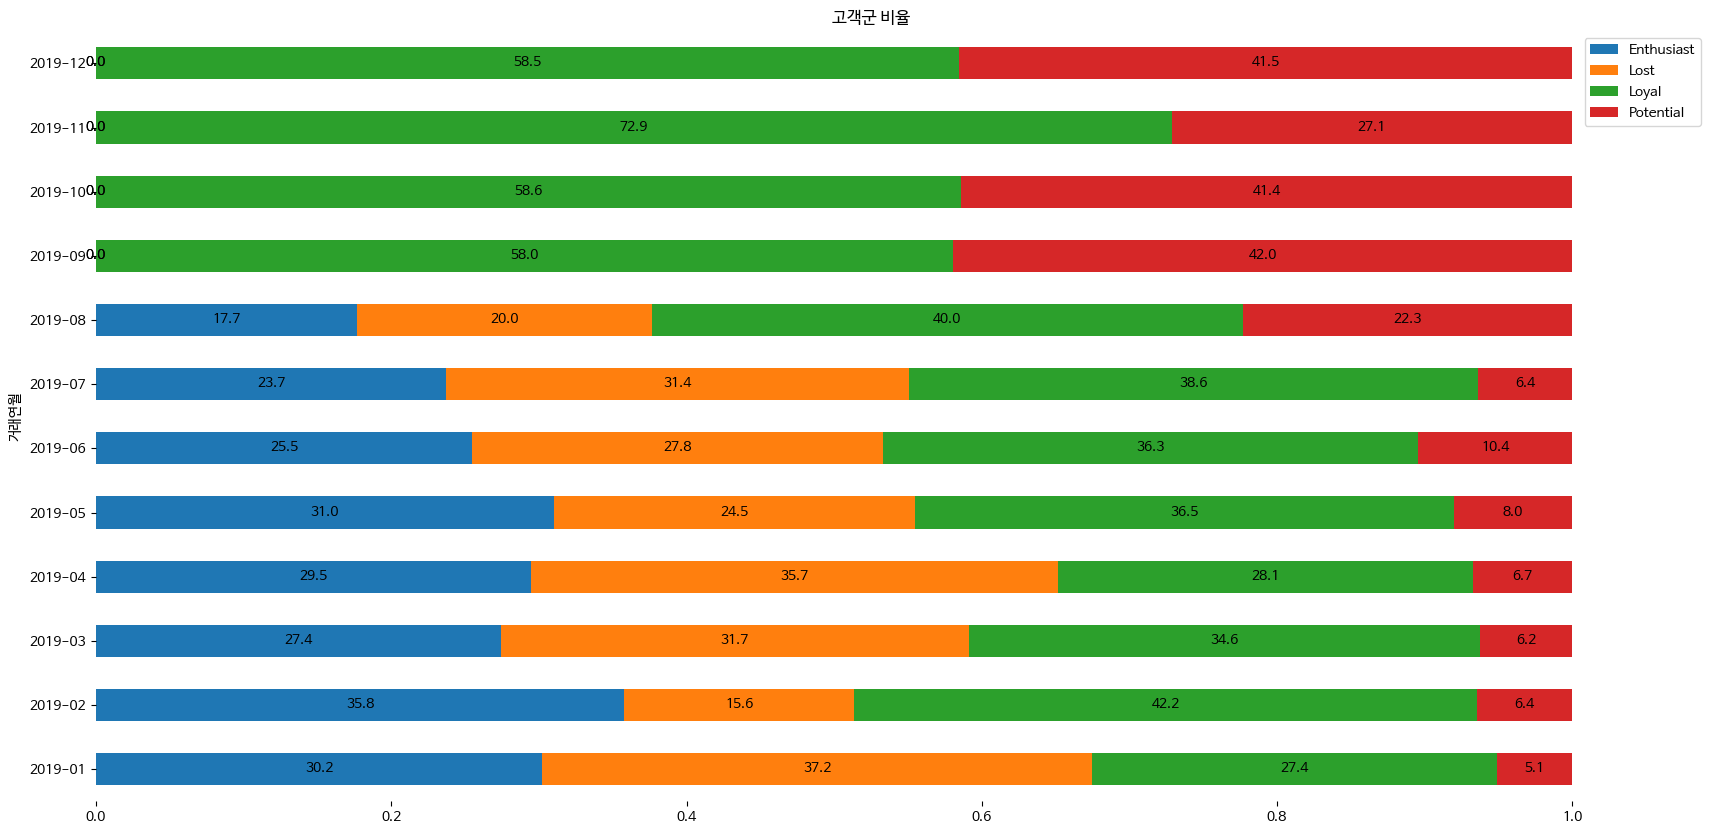

In [ ]:
# 월별 고객군 비율 변화 시각화
import warnings
warnings.filterwarnings('ignore')
# plt.style.use(['dark_background'])

ax = df_level_pivot.plot(kind='barh', stacked=True, title="고객군 비율", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black');

plt.box(False)
plt.gcf().set_size_inches(20, 10)
plt.legend(loc='upper right', bbox_to_anchor=(1.04,1))
plt.show()

```
1월부터 8월까지는 다양한 고객군의 방문이 있었습니다.
이 중 시간이 점차 지나면서 Potential(잡아야 할 고객)에 대한 비중이 점점 높아짐을 볼 수 있습니다.
9월부터 12월에는 Loyal(우수 고객) 및 Potential(잡아야 할 고객)의 비율이 높은 편인데 이는 다른 고객군들은 해당 월에 거래가 이루어 지지 않아
두 고객군이 높은 비율을 차지한 것으로 보입니다.
```

Loyal : 우수 고객 (구매 금액이 높고, 자주 방문하며 최근에도 방문한 고객)  

---
- 1년동안의 총 구매금액 중앙값이 5,000달러이며 최대 80,000달러 이상 구매한 고객도 있음을 확인하였습니다.
- 거래 기간 대비 거래 횟수가 많아 대부분 고객의 거래 주기가 10일 미만으로 나타나고 있습니다.
- 전체 고객의 성비와 비교해 보았을 때 우수 고객의 남녀 비율의 차이가 약간 적은 것으로 보입니다.
- 구매 카테고리, 고객의 지역, 가입 햇수에서 눈에 띄는 차이를 보이지 않았습니다.
- 우수 고객의 평균 배송료는 10달러 미만입니다.

In [ ]:
# cluster 1 고객 데이터 불러오기
c1 = seg_df[seg_df['고객군'] == 'Loyal']

c1.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객군,거래연월
9,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.50,Used,Jan,OFF10,10.00,0.10,50.45,남,California,43,3년 초과 4년 이하,14,26,3032.81,4,4,3,11,Loyal,2019-01
10,USER_0190,Transaction_0003,2019-01-01,Product_0966,Office,31,1.99,6.50,Clicked,Jan,OFF10,10.00,0.10,67.86,남,California,43,3년 초과 4년 이하,14,26,3032.81,4,4,3,11,Loyal,2019-01
11,USER_0190,Transaction_0003,2019-01-01,Product_0970,Office,31,1.99,6.50,Clicked,Jan,OFF10,10.00,0.10,67.86,남,California,43,3년 초과 4년 이하,14,26,3032.81,4,4,3,11,Loyal,2019-01
12,USER_0190,Transaction_0003,2019-01-01,Product_1025,Apparel,5,17.53,6.50,Used,Jan,SALE10,10.00,0.18,93.08,남,California,43,3년 초과 4년 이하,14,26,3032.81,4,4,3,11,Loyal,2019-01
13,USER_0190,Transaction_0004,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Clicked,Jan,ELEC10,10.00,0.10,270.09,남,California,43,3년 초과 4년 이하,14,26,3032.81,4,4,3,11,Loyal,2019-01


In [ ]:
# 결합 데이터 정보 확인 결과 - null값 존재 x
c1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29874 entries, 9 to 52908
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   고객ID       29874 non-null  object        
 1   거래ID       29874 non-null  object        
 2   거래날짜       29874 non-null  datetime64[ns]
 3   제품ID       29874 non-null  object        
 4   제품카테고리     29874 non-null  object        
 5   수량         29874 non-null  int64         
 6   평균금액       29874 non-null  float64       
 7   배송료        29874 non-null  float64       
 8   쿠폰상태       29874 non-null  object        
 9   월          29874 non-null  object        
 10  쿠폰코드       29874 non-null  object        
 11  할인율        29874 non-null  float64       
 12  GST        29874 non-null  float64       
 13  구매금액       29874 non-null  float64       
 14  성별         29874 non-null  object        
 15  고객지역       29874 non-null  object        
 16  가입기간       29874 non-null  int64         
 17

In [ ]:
# 우수 고객의 총구매금액
pur_price = pd.DataFrame(c1.groupby('고객ID')['구매금액'].sum().reset_index(name = '총구매금액'))

pur_price

,고객ID,총구매금액
0,USER_0001,15021.70
1,USER_0008,10473.22
2,USER_0009,5271.31
3,USER_0012,2217.09
4,USER_0015,2464.35
...,...,...
411,USER_1456,2636.13
412,USER_1459,6318.02
413,USER_1460,8081.79
414,USER_1464,2384.12


In [ ]:
pur_price.describe()

,총구매금액
count,416.00
mean,7094.30
std,8015.62
min,1800.06
25%,3161.71
50%,4827.51
75%,8084.84
max,82073.78


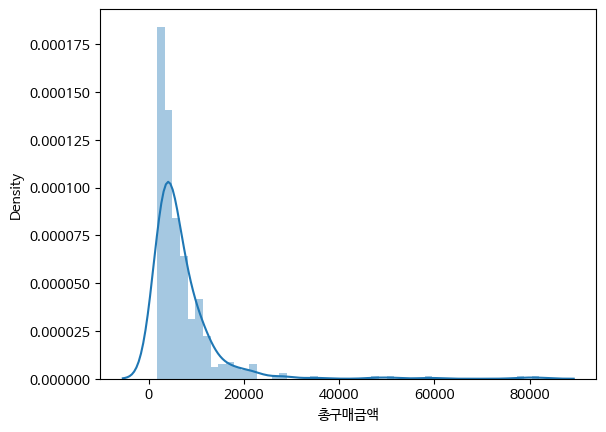

In [ ]:
# 총구매금액 시각화
sns.distplot(pur_price['총구매금액']);

```
우수 고객 중 1년 총 구매금액이 80,000 달러 이상 구매한 고객이 존재합니다.
총구매금액의 최저 금액, 최고 금액을 고려하여 평균이 아닌 총 구매 금액의 중앙값으로 확인한 결과 약 5,000달러입니다.
```

In [ ]:
## 거래 주기를 구하기 위한 데이터프레임 작성

# 거래 주기를 구하기 위한 데이터 추출
t_cycle = pd.DataFrame(c1.groupby('고객ID').agg({'거래날짜' : ['min', 'max'], '거래ID' : 'nunique'}))
t_cycle.columns = ['첫거래일', '마지막거래일', '거래수']
t_cycle.reset_index(inplace = True)

# 거래 주기 대상 추출
t_cycle = t_cycle[(t_cycle['마지막거래일'] - t_cycle['첫거래일']).dt.days > 1]
t_cycle = t_cycle[t_cycle['거래수'] >= 2]

# 거래주기 확인
t_cycle['기간차이'] = (t_cycle['마지막거래일'] - t_cycle['첫거래일'])
t_cycle['거래주기'] = t_cycle['기간차이'] / (t_cycle['거래수'] - 1)
t_cycle['거래주기'] = t_cycle['거래주기'].dt.days

t_cycle.sort_values(by = '거래주기', inplace = True)

t_cycle = t_cycle[t_cycle['기간차이'] != '0 days']
t_cycle

,고객ID,첫거래일,마지막거래일,거래수,기간차이,거래주기
168,USER_0535,2019-11-26,2019-12-01,21,5 days,0
178,USER_0572,2019-07-05,2019-10-02,114,89 days,0
172,USER_0546,2019-10-16,2019-11-14,42,29 days,0
171,USER_0544,2019-10-20,2019-10-23,22,3 days,0
186,USER_0586,2019-10-04,2019-10-14,18,10 days,0
...,...,...,...,...,...,...
96,USER_0312,2019-01-16,2019-12-14,15,332 days,23
41,USER_0127,2019-02-04,2019-12-24,15,323 days,23
67,USER_0216,2019-01-23,2019-10-17,12,267 days,24
344,USER_1237,2019-01-22,2019-12-22,14,334 days,25


In [ ]:
t_cycle.describe()

,첫거래일,마지막거래일,거래수,기간차이,거래주기
count,304,304,304.00,304,304.00
mean,2019-04-22 20:36:18.947368448,2019-11-06 23:12:37.894736896,40.95,198 days 02:36:18.947368422,6.58
min,2019-01-01 00:00:00,2019-08-22 00:00:00,12.00,2 days 00:00:00,0.00
25%,2019-02-10 00:00:00,2019-10-05 00:00:00,20.00,140 days 12:00:00,3.00
50%,2019-04-04 12:00:00,2019-11-17 00:00:00,30.00,206 days 00:00:00,5.00
75%,2019-06-20 06:00:00,2019-12-10 00:00:00,45.00,268 days 00:00:00,9.00
max,2019-12-06 00:00:00,2019-12-31 00:00:00,328.00,358 days 00:00:00,29.00
std,NaN,NaN,40.53,92 days 00:41:05.869757376,5.27


```
우수 고객 중 거래 주기 분석 대상이 304명으로 약 73%의 비율을 차지하고 있습니다.
첫 구매에서 마지막 거래 기간 차이 대비 거래 수가 많아 거래 주기가 대부분 10일 미만으로 비교적 짧은 편입니다.
```


In [ ]:
# 우수 고객이 주로 구매한 제품 카테고리
c1['제품카테고리'].value_counts()

제품카테고리
Apparel                 9777
Nest-USA                8205
Office                  3487
Nest                    1918
Drinkware               1852
Lifestyle               1677
Bags                    1031
Headgear                 415
Notebooks & Journals     359
Waze                     315
Accessories              180
Nest-Canada              167
Bottles                  142
Gift Cards               102
Fun                       75
Housewares                54
Backpacks                 46
Google                    36
Android                   18
More Bags                 18
Name: count, dtype: int64

```
제품카테고리별 전체 구매금액과 크게 순서의 차이가 보이지 않는 것으로 보입니다.
```

In [ ]:
# 고객이 많이 구매한 제품
product = pd.DataFrame(c1.groupby('고객ID')['제품ID'].value_counts().reset_index(name = '구매수'))
product.sort_values('구매수', ascending = False, inplace = True)
product.head(20)

,고객ID,제품ID,구매수
9109,USER_0643,Product_0981,47
1750,USER_0118,Product_0981,46
1751,USER_0118,Product_0976,42
10486,USER_0736,Product_0981,41
1752,USER_0118,Product_0983,40
7736,USER_0563,Product_0981,40
10487,USER_0736,Product_0976,36
17422,USER_1355,Product_0981,35
9110,USER_0643,Product_0983,34
7737,USER_0563,Product_0983,33


In [ ]:
# 많이 구매한 제품 상위 11개
p = pd.DataFrame(product['제품ID'].value_counts())
p.rename(columns = {'제품ID' : '구매수'}, inplace = True)
p.head(11)

,count
제품ID,
Product_0981,393
Product_0976,389
Product_0983,378
Product_0984,308
Product_0989,302
Product_0985,290
Product_0992,256
Product_0990,255
Product_0904,250


In [ ]:
# 구매 고객의 성별 비율 확인
cs_gp = pd.DataFrame(c1.groupby('성별')['고객ID'].nunique().reset_index(name = '고객수'))
cs_gp

,성별,고객수
0,남,167
1,여,249


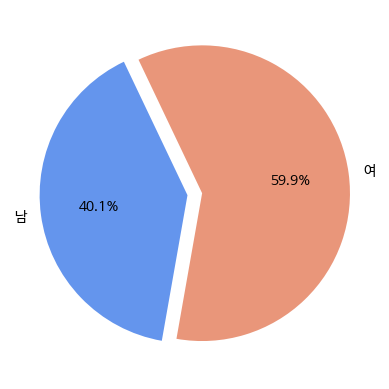

In [ ]:
# 성별 비율 시각화
import matplotlib.pyplot as plt

ratio = [167/416, 249/416]
labels = ['남', '여']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
우수고객 비율이 남성에 비해 여성이 높은 것으로 나타났습니다.
전체 고객 비율이 여성이 63.6%, 남성이 36.4%인 것과 비교하여 우수 고객의 남성 비율이 적지 않음을 볼 수 있습니다.
```

In [ ]:
# 지역별 우수고객 수 확인
lo_gp = pd.DataFrame(c1.groupby('고객지역')['고객ID'].nunique().reset_index(name = '고객수'))
lo_gp.sort_values(by = '고객수', ascending = False, inplace = True)
lo_gp

,고객지역,고객수
1,Chicago,145
0,California,116
3,New York,93
2,New Jersey,39
4,Washington DC,23


```
지역별 전체 고객 수와 큰 차이를 보이지 않습니다.
```

In [ ]:
# 가입 기간 확인
du_gp = pd.DataFrame(c1.groupby('가입기간_년')['고객ID'].nunique().reset_index(name = '고객수'))
du_gp

,가입기간_년,고객수
0,1년 이하,91
1,1년 초과 2년 이하,105
2,2년 초과 3년 이하,103
3,3년 초과 4년 이하,103
4,4년 초과,14


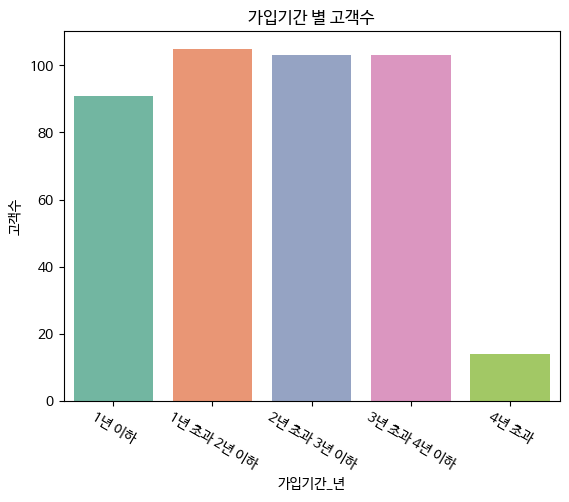

In [ ]:
ax = sns.barplot(du_gp, x = '가입기간_년', y = '고객수', hue = '가입기간_년', palette = 'Set2')
ax.set_title("가입기간 별 고객수")
plt.xticks(rotation = -30);

```
4년 초과를 제외하고는 고르게 분포되어있음을 확인하였습니다.
```

In [ ]:
# 쿠폰 사용 여부 확인
cp_gp = pd.DataFrame(c1.groupby('쿠폰상태')['고객ID'].nunique().reset_index(name = '고객수'))
cp_gp

,쿠폰상태,고객수
0,Clicked,416
1,Not Used,414
2,Used,416


```
쿠폰 사용 상태에 대해서도 눈에 띄는 차이를 보이지 않았습니다.
쿠폰 사용 여부에 관계없이 자주 거래를 하는 것으로 보입니다.
```

In [ ]:
### 우수 고객의 평균 배송료
# 거래별 평균 배송료 구하기
cost_gp = pd.DataFrame(c1.groupby(['고객ID', '거래ID'])['배송료'].mean().reset_index(name = '배송료'))

# 고객의 평균 배송료
deli_cost = pd.DataFrame(cost_gp.groupby('고객ID')['배송료'].mean().reset_index(name = '평균배송료'))
deli_cost

,고객ID,평균배송료
0,USER_0001,9.24
1,USER_0008,9.04
2,USER_0009,7.71
3,USER_0012,9.72
4,USER_0015,9.40
...,...,...
411,USER_1456,6.31
412,USER_1459,11.59
413,USER_1460,6.18
414,USER_1464,11.69


In [ ]:
deli_cost.describe()

,평균배송료
count,416.00
mean,8.59
std,2.27
min,5.57
25%,7.16
50%,7.99
75%,9.32
max,22.22


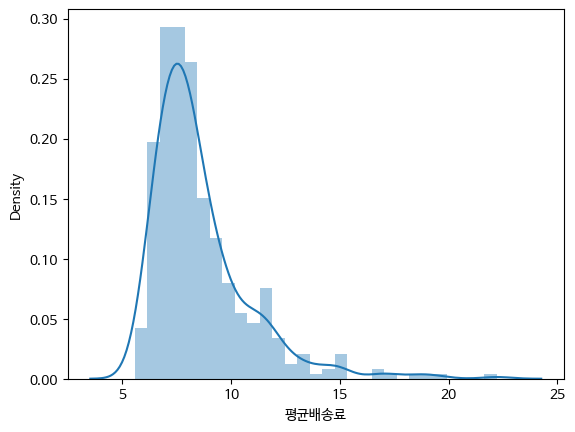

In [ ]:
# 고객별 평균배송료 분포
import seaborn as sns

sns.distplot(deli_cost['평균배송료']);

```
대부분의 고객이 평균 10달러 미만의 배송료를 지불하는 것으로 보입니다.
```

Lost : 이탈 우려 고객 (구매 금액, 구매 빈도가 낮고 최근에도 방문하지 않은 고객)  

---
- 1년 동안의 거래 수가 적고 첫 방문하여 구매한 이후 구매가 이루어지지 않은 경우가 많았습니다.
- 성비는 전체 고객의 성비와 비슷한 양상을 보입니다.
- 가입 기간이 1년 이하인 고객의 비중이 22%로 적지 않은 비율을 보입니다.
- 쿠폰을 사용한 경우보다 쿠폰을 클릭만 하고 사용하지 않은 경우가 약간 많았습니다.
- 평균배송료에서 큰 차이가 발생하지 않았지만 우수 고객 대비 높은 평균배송료를 나타내는 고객이 보였습니다.

In [ ]:
# 고객 데이터 불러오기
c0 = seg_df[seg_df['고객군'] == 'Lost']

c0.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객군,거래연월
46,USER_0345,Transaction_0013,2019-01-01,Product_0971,Lifestyle,1,1.24,6.50,Clicked,Jan,EXTRA10,10.00,0.18,1.46,여,California,30,2년 초과 3년 이하,365,1,1.46,1,1,1,3,Lost,2019-01
105,USER_1347,Transaction_0050,2019-01-02,Product_0951,Office,1,3.08,6.50,Clicked,Jan,OFF10,10.00,0.10,3.39,여,New Jersey,24,1년 초과 2년 이하,331,3,837.34,1,1,2,4,Lost,2019-01
142,USER_0922,Transaction_0072,2019-01-02,Product_0777,Apparel,1,31.35,6.50,Clicked,Jan,SALE10,10.00,0.18,36.99,남,Chicago,49,4년 초과,364,5,910.13,1,1,2,4,Lost,2019-01
143,USER_0922,Transaction_0072,2019-01-02,Product_0778,Apparel,1,19.80,6.50,Not Used,Jan,SALE10,10.00,0.18,23.36,남,Chicago,49,4년 초과,364,5,910.13,1,1,2,4,Lost,2019-01
144,USER_0922,Transaction_0072,2019-01-02,Product_0781,Apparel,1,19.80,6.50,Clicked,Jan,SALE10,10.00,0.18,23.36,남,Chicago,49,4년 초과,364,5,910.13,1,1,2,4,Lost,2019-01


In [ ]:
# 이탈 우려 고객의 총구매금액
pur_price = pd.DataFrame(c0.groupby('고객ID')['구매금액'].sum().reset_index(name = '총구매금액'))

pur_price

,고객ID,총구매금액
0,USER_0010,579.40
1,USER_0022,742.86
2,USER_0023,1420.56
3,USER_0027,32.78
4,USER_0029,1570.66
...,...,...
419,USER_1454,92.06
420,USER_1457,131.02
421,USER_1462,58.35
422,USER_1463,582.36


In [ ]:
pur_price.describe()

,총구매금액
count,424.00
mean,651.37
std,521.59
min,1.32
25%,185.47
50%,563.36
75%,1010.79
max,2296.05


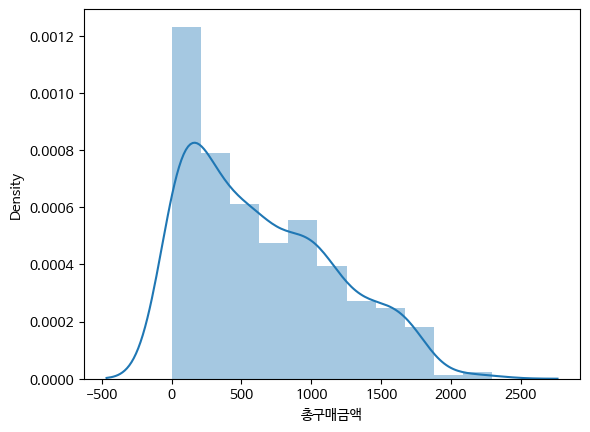

In [ ]:
# 총구매금액 시각화
sns.distplot(pur_price['총구매금액']);

```
이탈 우려 고객의 총구매금액 최대 금액이 약 2,300달러로, 우수 고객의 총구매금액 중앙값(약 5,000달러)보다
훨씬 낮은 총구매금액을 나타내는 것을 볼 수 있습니다.
```

In [ ]:
## 거래 주기를 구하기 위한 데이터프레임 작성

# 거래 주기를 구하기 위한 데이터 추출
t_cycle0 = pd.DataFrame(c0.groupby('고객ID').agg({'거래날짜' : ['min', 'max'], '거래ID' : 'nunique'}))
t_cycle0.columns = ['첫거래일', '마지막거래일', '거래수']
t_cycle0.reset_index(inplace = True)

# 거래 주기 대상 추출
t_cycle0 = t_cycle0[(t_cycle0['마지막거래일'] - t_cycle0['첫거래일']).dt.days > 1]
t_cycle0 = t_cycle0[t_cycle0['거래수'] >= 2]

# 거래주기 확인
t_cycle0['기간차이'] = (t_cycle0['마지막거래일'] - t_cycle0['첫거래일'])
t_cycle0['거래주기'] = t_cycle0['기간차이'] / (t_cycle0['거래수'] - 1)
t_cycle0['거래주기'] = t_cycle0['거래주기'].dt.days

t_cycle0.sort_values(by = '거래주기', inplace = True)

t_cycle0 = t_cycle0[t_cycle0['기간차이'] != '0 days']
t_cycle0.head()

,고객ID,첫거래일,마지막거래일,거래수,기간차이,거래주기
414,USER_1427,2019-07-10,2019-07-16,11,6 days,0
402,USER_1386,2019-05-10,2019-05-18,11,8 days,0
292,USER_1016,2019-01-20,2019-01-29,11,9 days,0
88,USER_0296,2019-06-03,2019-06-21,11,18 days,1
157,USER_0571,2019-06-22,2019-07-12,10,20 days,2


In [ ]:
t_cycle0.describe()

,첫거래일,마지막거래일,거래수,기간차이,거래주기
count,76,76,76.00,76,76.00
mean,2019-03-24 00:56:50.526315776,2019-06-23 04:06:18.947368448,6.13,91 days 03:09:28.421052632,28.26
min,2019-01-02 00:00:00,2019-01-22 00:00:00,2.00,4 days 00:00:00,0.00
25%,2019-01-31 18:00:00,2019-05-30 18:00:00,4.00,45 days 06:00:00,8.00
50%,2019-03-27 00:00:00,2019-07-07 12:00:00,6.00,78 days 00:00:00,19.00
75%,2019-04-20 00:00:00,2019-07-28 00:00:00,8.00,132 days 18:00:00,33.25
max,2019-08-14 00:00:00,2019-08-19 00:00:00,11.00,209 days 00:00:00,172.00
std,NaN,NaN,2.85,59 days 04:27:01.637527504,31.85


```
우수 고객에 비해 거래 주기의 평균과 중앙값이 큰 편이고, 거래 주기 대상의 수가 이탈 우려 고객 수 중 약 17%밖에 되지 않습니다.
첫 방문하여 구매한 이후 구매가 이루어지지 않은 경우가 많은 것으로 보입니다.
```

In [ ]:
# 이탈 우려 고객이 주로 구매한 제품 카테고리
c0['제품카테고리'].value_counts()

제품카테고리
Apparel                 1663
Nest-USA                 876
Office                   599
Drinkware                311
Lifestyle                251
Bags                     148
Notebooks & Journals      74
Headgear                  65
Waze                      36
Bottles                   26
Nest-Canada               18
Fun                       14
Google                    12
Gift Cards                10
Housewares                 9
Nest                       9
Backpacks                  7
Android                    4
More Bags                  4
Accessories                2
Name: count, dtype: int64

```
많이 구매한 제품 카테고리 순서는 우수 고객과 큰 차이가 없습니다.
```

In [ ]:
# 고객이 많이 구매한 제품
product0 = pd.DataFrame(c0.groupby('고객ID')['제품ID'].value_counts().reset_index(name = '구매수'))
product0.sort_values('구매수', ascending = False, inplace = True)
product0.head(20)

,고객ID,제품ID,구매수
2508,USER_0928,Product_0976,4
2571,USER_0944,Product_0981,4
548,USER_0246,Product_0983,4
2808,USER_1037,Product_0981,4
458,USER_0221,Product_0981,4
2462,USER_0920,Product_0983,4
2733,USER_1016,Product_0981,4
2509,USER_0928,Product_0981,4
2048,USER_0769,Product_0981,3
207,USER_0122,Product_0983,3


In [ ]:
# 많이 구매한 제품 상위 11개
p0 = pd.DataFrame(product0['제품ID'].value_counts())
p0.rename(columns = {'제품ID' : '구매수'}, inplace = True)
p0.head(11)

,count
제품ID,
Product_0983,163
Product_0981,162
Product_0976,160
Product_0984,72
Product_0904,61
Product_0985,57
Product_0880,48
Product_0892,40
Product_0915,38


```
상위 11개 중 아래 네 개의 제품은 우수고객과 순서가 다르게 나타났습니다.
```

In [ ]:
# 구매 고객의 성별 비율 확인
cs_gp = pd.DataFrame(c0.groupby('성별')['고객ID'].nunique().reset_index(name = '고객수'))
cs_gp

,성별,고객수
0,남,149
1,여,275


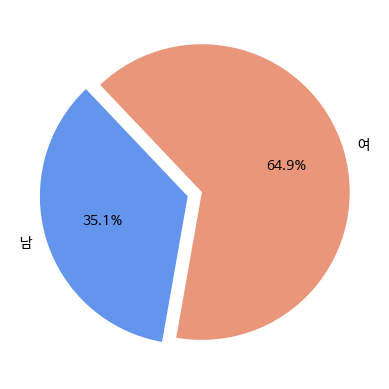

In [ ]:
# 성별 비율 시각화
import matplotlib.pyplot as plt

ratio = [149/424, 275/424]
labels = ['남', '여']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
여성의 비율이 남성의 비율보다 약 1.8배 높게 나타났습니다.
```

In [ ]:
# 지역별 이탈 우려 고객 수 확인
lo_gp = pd.DataFrame(c0.groupby('고객지역')['고객ID'].nunique().reset_index(name = '고객수'))
lo_gp.sort_values(by = '고객수', ascending = False, inplace = True)
lo_gp

,고객지역,고객수
0,California,133
1,Chicago,133
3,New York,106
2,New Jersey,37
4,Washington DC,15


```
지역별 전체 고객 수와 큰 차이를 보이지 않습니다.
```

In [ ]:
# 가입 기간 확인
du_gp = pd.DataFrame(c0.groupby('가입기간_년')['고객ID'].nunique().reset_index(name = '고객수'))
du_gp

,가입기간_년,고객수
0,1년 이하,94
1,1년 초과 2년 이하,107
2,2년 초과 3년 이하,109
3,3년 초과 4년 이하,99
4,4년 초과,15


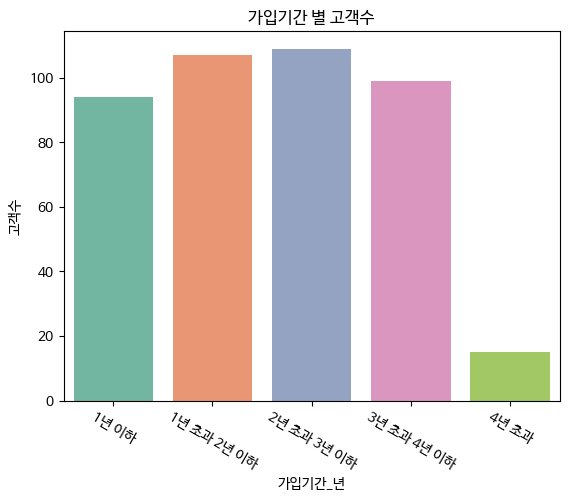

In [ ]:
# 시각화
ax = sns.barplot(du_gp, x = '가입기간_년', y = '고객수', hue = '가입기간_년', palette = 'Set2')
ax.set_title("가입기간 별 고객수")
plt.xticks(rotation = -30);

```
우수 고객의 비율과 큰 차이는 없지만, 이탈 우려 고객 중 비교적 가입 기간이 짧은 1년 이하의 고객의 비중이 약 22%로
적지 않은 비율을 차지하고 있습니다.
```

In [ ]:
# 쿠폰 사용 여부 확인
cp_gp = pd.DataFrame(c0.groupby('쿠폰상태')['고객ID'].nunique().reset_index(name = '고객수'))
cp_gp

,쿠폰상태,고객수
0,Clicked,396
1,Not Used,288
2,Used,360


```
우수 고객은 쿠폰 사용 상태의 비율 차이가 크게 나타나지 않았지만, 이탈 우려 고객에서는 쿠폰을 클릭만 하고 사용하지 않은 경우(Clicked)가
사용한 경우(Uesd)보다 약간 많았습니다.
쿠폰을 사용하지 않은 경우(Not Used)가 사용한 경우 보다 적게 나타났습니다.
```

In [ ]:
# 거래별 평균 배송료 구하기
cost_gp = pd.DataFrame(c0.groupby(['고객ID', '거래ID'])['배송료'].mean().reset_index(name = '배송료'))

# 고객의 평균 배송료
deli_cost = pd.DataFrame(cost_gp.groupby('고객ID')['배송료'].mean().reset_index(name = '평균배송료'))
deli_cost

,고객ID,평균배송료
0,USER_0010,7.88
1,USER_0022,11.47
2,USER_0023,14.02
3,USER_0027,6.00
4,USER_0029,7.56
...,...,...
419,USER_1454,9.49
420,USER_1457,6.00
421,USER_1462,6.25
422,USER_1463,31.45


In [ ]:
deli_cost.describe()

,평균배송료
count,424.00
mean,10.67
std,17.48
min,5.00
25%,6.17
50%,6.79
75%,10.43
max,323.47


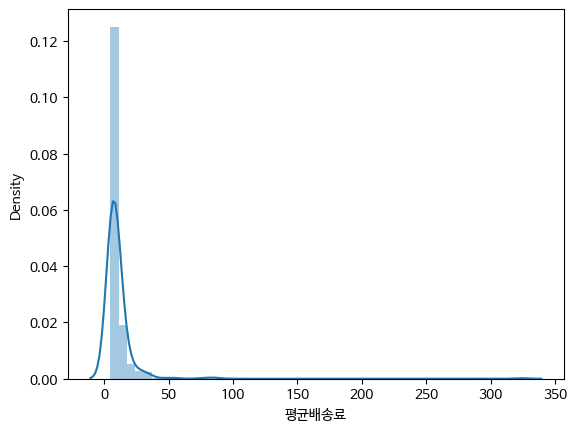

In [ ]:
# 고객별 평균배송료 분포
import seaborn as sns

sns.distplot(deli_cost['평균배송료']);

```
평균 배송료가 300달러를 초과하는 고객이 존재하는 것으로 보입니다.
중앙값 대비 우수 고객보다 배송료가 낮지만, 구매 금액이 우수 고객보다 낮은 것에 비해 배송료의 차이가 발생하지 않았습니다.
```

Potential : 잡아야 할 고객 (최근에 방문했지만 구매 빈도나 구매 금액이 다소 낮은 고객)

---    

- 이탈 우려 고객에 비해서 총구매금액 중앙값이 높은 편이고, 거래 주기 분석 대상의 대부분이 한 달 이내에 방문하여 구매하는 것으로 보입니다.
- 평균 배송료도 우수 고객군과 큰 차이가 발생하지 않았고 최대 평균배송료도 이탈 우려 고객에 비해서는 낮은 편입니다.

In [ ]:
# cluster 2 고객 데이터 불러오기
c2 = seg_df[seg_df['고객군'] == 'Potential']

c2.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객군,거래연월
65,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,Jan,ELEC10,10.00,0.10,169.08,남,California,49,4년 초과,124,6,903.36,3,2,2,7,Potential,2019-01
82,USER_0730,Transaction_0035,2019-01-01,Product_0416,Apparel,1,15.67,6.50,Used,Jan,SALE10,10.00,0.18,16.64,남,California,32,2년 초과 3년 이하,79,13,987.99,3,3,2,8,Potential,2019-01
83,USER_0730,Transaction_0035,2019-01-01,Product_0638,Apparel,1,61.89,6.50,Clicked,Jan,SALE10,10.00,0.18,73.03,남,California,32,2년 초과 3년 이하,79,13,987.99,3,3,2,8,Potential,2019-01
1331,USER_1438,Transaction_0692,2019-01-10,Product_0976,Nest-USA,1,122.77,6.50,Clicked,Jan,ELEC10,10.00,0.10,135.05,여,California,26,2년 초과 3년 이하,72,5,613.45,3,1,1,5,Potential,2019-01
1332,USER_1438,Transaction_0693,2019-01-10,Product_0981,Nest-USA,1,153.71,6.50,Not Used,Jan,ELEC10,10.00,0.10,169.08,여,California,26,2년 초과 3년 이하,72,5,613.45,3,1,1,5,Potential,2019-01


In [ ]:
# 잡아야 할 고객의 총구매금액
pur_price = pd.DataFrame(c2.groupby('고객ID')['구매금액'].sum().reset_index(name = '총구매금액'))

pur_price

,고객ID,총구매금액
0,USER_0000,24.98
1,USER_0002,1492.41
2,USER_0003,1339.56
3,USER_0004,1369.94
4,USER_0005,688.03
...,...,...
320,USER_1447,437.14
321,USER_1455,1010.88
322,USER_1458,76.62
323,USER_1461,2255.81


In [ ]:
# 총구매금액의 기술통계량 확인
pur_price.describe()

,총구매금액
count,325.00
mean,1008.65
std,734.66
min,0.99
25%,432.67
50%,922.60
75%,1465.82
max,3525.36


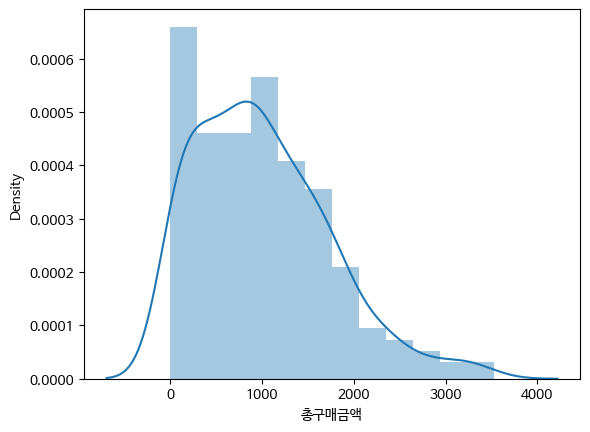

In [ ]:
# 총구매금액 시각화
sns.distplot(pur_price['총구매금액']);

```
이탈 우려 고객에 비해 총구매금액 중앙값이 약 1.6배 높으며 총구매금액 분포의 범위도 이탈 우려 고객에 비해 넓은 편입니다.
```

In [ ]:
## 거래 주기를 구하기 위한 데이터프레임 작성

# 거래 주기를 구하기 위한 데이터 추출
t_cycle2 = pd.DataFrame(c2.groupby('고객ID').agg({'거래날짜' : ['min', 'max'], '거래ID' : 'nunique'}))
t_cycle2.columns = ['첫거래일', '마지막거래일', '거래수']
t_cycle2.reset_index(inplace = True)

# 거래 주기 대상 추출
t_cycle2 = t_cycle2[(t_cycle2['마지막거래일'] - t_cycle2['첫거래일']).dt.days > 1]
t_cycle2 = t_cycle2[t_cycle2['거래수'] >= 2]

# 거래주기 확인
t_cycle2['기간차이'] = (t_cycle2['마지막거래일'] - t_cycle2['첫거래일'])
t_cycle2['거래주기'] = t_cycle2['기간차이'] / (t_cycle2['거래수'] - 1)
t_cycle2['거래주기'] = t_cycle2['거래주기'].dt.days

t_cycle2.sort_values(by = '거래주기', inplace = True)

t_cycle2 = t_cycle2[t_cycle2['기간차이'] != '0 days']
t_cycle2.head()

,고객ID,첫거래일,마지막거래일,거래수,기간차이,거래주기
123,USER_0491,2019-10-26,2019-11-03,12,8 days,0
187,USER_0764,2019-09-28,2019-09-30,4,2 days,0
99,USER_0390,2019-12-06,2019-12-12,10,6 days,0
216,USER_0927,2019-11-02,2019-11-14,8,12 days,1
35,USER_0125,2019-12-08,2019-12-18,7,10 days,1


In [ ]:
t_cycle2.describe()

,첫거래일,마지막거래일,거래수,기간차이,거래주기
count,113,113,113.00,113,113.00
mean,2019-06-08 00:38:13.805309696,2019-10-23 18:41:24.955752192,8.24,137 days 18:03:11.150442478,24.89
min,2019-01-01 00:00:00,2019-08-22 00:00:00,2.00,2 days 00:00:00,0.00
25%,2019-03-28 00:00:00,2019-09-18 00:00:00,6.00,47 days 00:00:00,7.00
50%,2019-06-13 00:00:00,2019-10-23 00:00:00,8.00,132 days 00:00:00,19.00
75%,2019-08-21 00:00:00,2019-12-04 00:00:00,11.00,195 days 00:00:00,30.00
max,2019-12-08 00:00:00,2019-12-21 00:00:00,19.00,332 days 00:00:00,167.00
std,NaN,NaN,3.59,92 days 06:36:47.618786670,28.68


```
잡아야 할 고객군에 속한 전체 고객 중 약 34%가 거래 주기 대상에 속하여 거래 이탈 우려 고객보다 높은 비율을 차지했습니다.
거래 주기 분석 대상 중 대부분의 고객이 한 달 이내에는 다시 방문하여 구매하는 것으로 보입니다.
```

In [ ]:
# 많이 구매한 제품 상위 11개
product2 = pd.DataFrame(c2.groupby('고객ID')['제품ID'].value_counts().reset_index(name = '구매수'))
product2.sort_values('구매수', ascending = False, inplace = True)
p2 = pd.DataFrame(product2['제품ID'].value_counts())
p2.rename(columns = {'제품ID' : '구매수'}, inplace = True)
p2.head(11)

,count
제품ID,
Product_0981,130
Product_0983,130
Product_0976,129
Product_0989,88
Product_0992,81
Product_0984,76
Product_0904,62
Product_0990,60
Product_0922,58


```
우수 고객이 자주 구매한 제품번호와 많은 차이를 보이지 않습니다.
```

In [ ]:
# 구매 고객의 성별 비율 확인
cs_gp = pd.DataFrame(c2.groupby('성별')['고객ID'].nunique().reset_index(name = '고객수'))
cs_gp

,성별,고객수
0,남,106
1,여,219


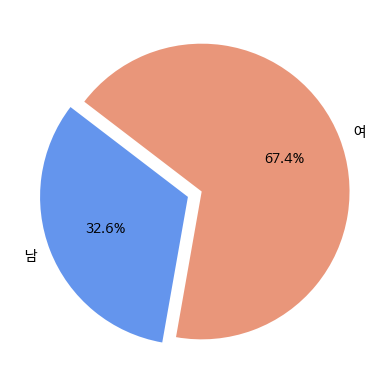

In [ ]:
# 성별 비율 시각화
import matplotlib.pyplot as plt

ratio = [106/325, 219/325]
labels = ['남', '여']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
여성의 비율이 남성에 비해 2배 이상 높은 것으로 확인되었습니다.
```

In [ ]:
# 가입 기간 확인
du_gp = pd.DataFrame(c2.groupby('가입기간_년')['고객ID'].nunique().reset_index(name = '고객수'))
du_gp

,가입기간_년,고객수
0,1년 이하,73
1,1년 초과 2년 이하,82
2,2년 초과 3년 이하,81
3,3년 초과 4년 이하,76
4,4년 초과,13


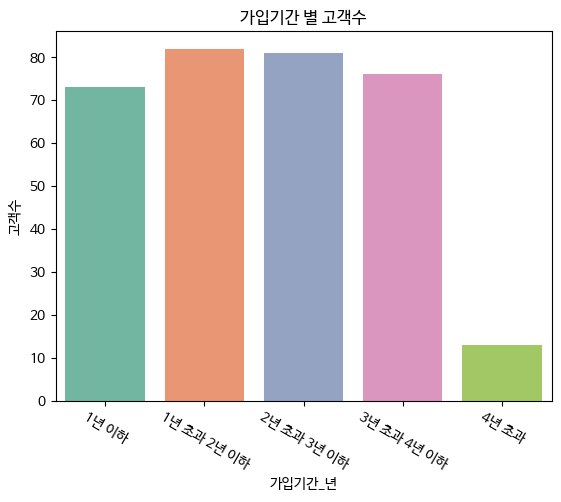

In [ ]:
# 시각화
ax = sns.barplot(du_gp, x = '가입기간_년', y = '고객수', hue = '가입기간_년', palette = 'Set2')
ax.set_title("가입기간 별 고객수")
plt.xticks(rotation = -30);

```
다른 고객군과 마찬가지로 가입기간 비율에 큰 차이는 없는 것으로 보입니다.
```

In [ ]:
# 쿠폰 사용 여부 확인
cp_gp = pd.DataFrame(c2.groupby('쿠폰상태')['고객ID'].nunique().reset_index(name = '고객수'))
cp_gp

,쿠폰상태,고객수
0,Clicked,307
1,Not Used,245
2,Used,295


```
잡아야할 고객 역시 쿠폰을 클릭만 하고 사용하지 않은 경우(Clicked)가 쿠폰을 사용한 경우(Used)보다 약간 많이 발생하였습니다.
```

In [ ]:
# 거래별 평균 배송료 구하기
cost_gp = pd.DataFrame(c2.groupby(['고객ID', '거래ID'])['배송료'].mean().reset_index(name = '배송료'))

# 고객의 평균 배송료
deli_cost = pd.DataFrame(cost_gp.groupby('고객ID')['배송료'].mean().reset_index(name = '평균배송료'))
deli_cost

,고객ID,평균배송료
0,USER_0000,75.00
1,USER_0002,10.13
2,USER_0003,7.49
3,USER_0004,11.88
4,USER_0005,6.00
...,...,...
320,USER_1447,8.33
321,USER_1455,9.46
322,USER_1458,6.00
323,USER_1461,9.10


In [ ]:
deli_cost.describe()

,평균배송료
count,325.00
mean,9.14
std,10.84
min,4.80
25%,6.00
50%,6.73
75%,8.80
max,168.50


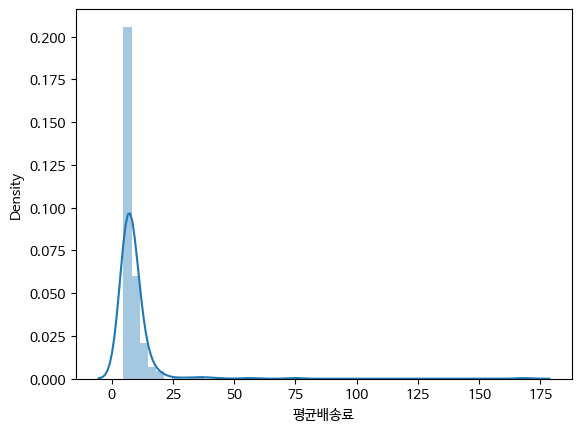

In [ ]:
# 고객별 평균배송료 분포
import seaborn as sns

sns.distplot(deli_cost['평균배송료']);

```
평균배송료 최대 금액이 100달러가 초과하는 고객이 존재하지만 이탈 우려 고객에 비해 낮은 금액입니다.
우수 고객군과 큰 차이없이 평균배송료가 10달러 미만인 고객이 대부분인 것으로 보입니다.

```

Enthusiast : 휴면 가능성이 있는 잠재 우수 고객 (구매금액은 다소 높지만 구매 빈도가 VIP에 비해 낮고, 방문한 지 기간이 지난 고객)

---

- 우수 고객을 제외한 다른 고객군 대비 높은 총구매금액 지표를 보여주고 있습니다.
- 거래 주기는 우수 고객보다는 짧은 주기를 보이고 있지만 거래주기 분석 대상이 우수 고객에 비해 낮은 비율을 나타냅니다.
- 가입 기간이 3년 이상 4년 이상인 고객의 비율이 약간 높게 나타났습니다.
- 평균 배송료에서는 큰 차이를 보이지 않았습니다.

In [ ]:
# cluster 3 고객 데이터 불러오기
c3 = seg_df[seg_df['고객군'] == 'Enthusiast']

c3.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,GST,구매금액,성별,고객지역,가입기간,가입기간_년,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객군,거래연월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.00,0.10,152.17,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,Jan,OFF10,10.00,0.10,2.03,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.00,0.18,103.43,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,Enthusiast,2019-01
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,Jan,AIO10,10.00,0.18,17.52,남,Chicago,12,1년 이하,340,177,37377.52,1,4,4,9,Enthusiast,2019-01


In [ ]:
# 잠재 우수 고객의 총구매금액
pur_price = pd.DataFrame(c3.groupby('고객ID')['구매금액'].sum().reset_index(name = '총구매금액'))

pur_price

,고객ID,총구매금액
0,USER_0006,7366.30
1,USER_0013,1463.40
2,USER_0018,2935.77
3,USER_0024,2421.17
4,USER_0026,15042.39
...,...,...
298,USER_1434,1778.36
299,USER_1440,3393.15
300,USER_1442,4078.21
301,USER_1444,2769.62


In [ ]:
pur_price.describe()

,총구매금액
count,303.00
mean,4242.59
std,3313.86
min,842.04
25%,2203.85
50%,3384.20
75%,5474.17
max,37377.52


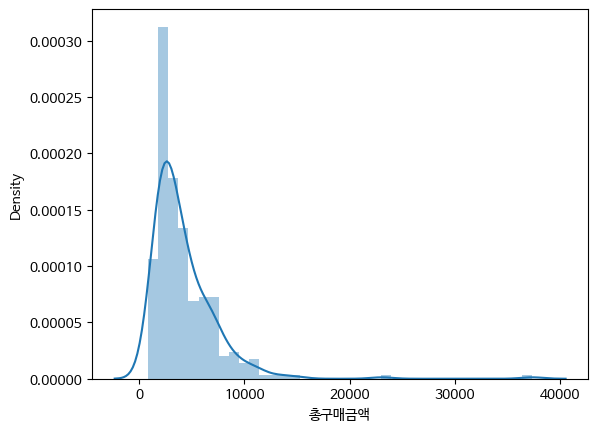

In [ ]:
# 총구매금액 시각화
sns.distplot(pur_price['총구매금액']);

```
우수 고객 대비 총구매금액의 평균값이나 중앙값은 낮지만, 총구매금액 최대가 30,000달러를 초과하는 경우도 존재하며
이탈 우려 고객, 잡아야 할 고객 대비 높은 총구매금액 지표를 보여주고 있습니다.
```

In [ ]:
## 거래 주기를 구하기 위한 데이터프레임 작성

# 거래 주기를 구하기 위한 데이터 추출
t_cycle3 = pd.DataFrame(c3.groupby('고객ID').agg({'거래날짜' : ['min', 'max'], '거래ID' : 'nunique'}))
t_cycle3.columns = ['첫거래일', '마지막거래일', '거래수']
t_cycle3.reset_index(inplace = True)

# 거래 주기 대상 추출
t_cycle3 = t_cycle3[(t_cycle3['마지막거래일'] - t_cycle3['첫거래일']).dt.days > 1]
t_cycle3 = t_cycle3[t_cycle3['거래수'] >= 2]

# 거래주기 확인
t_cycle3['기간차이'] = (t_cycle3['마지막거래일'] - t_cycle3['첫거래일'])
t_cycle3['거래주기'] = t_cycle3['기간차이'] / (t_cycle3['거래수'] - 1)
t_cycle3['거래주기'] = t_cycle3['거래주기'].dt.days

t_cycle3.sort_values(by = '거래주기', inplace = True)

t_cycle3 = t_cycle3[t_cycle3['기간차이'] != '0 days']
t_cycle3.head()

,고객ID,첫거래일,마지막거래일,거래수,기간차이,거래주기
0,USER_0006,2019-05-26,2019-06-25,44,30 days,0
132,USER_0784,2019-04-30,2019-05-25,52,25 days,0
50,USER_0332,2019-07-18,2019-08-02,44,15 days,0
277,USER_1358,2019-01-01,2019-01-26,177,25 days,0
121,USER_0746,2019-02-11,2019-02-14,24,3 days,0


In [ ]:
t_cycle3.describe()

,첫거래일,마지막거래일,거래수,기간차이,거래주기
count,124,124,124.00,124,124.00
mean,2019-03-17 11:25:09.677419264,2019-06-19 09:17:25.161290240,27.76,93 days 21:52:15.483870968,4.61
min,2019-01-01 00:00:00,2019-01-26 00:00:00,5.00,2 days 00:00:00,0.00
25%,2019-01-30 18:00:00,2019-05-24 18:00:00,14.00,54 days 12:00:00,1.00
50%,2019-03-12 12:00:00,2019-06-28 00:00:00,22.00,86 days 12:00:00,4.00
75%,2019-04-18 00:00:00,2019-07-25 06:00:00,34.25,137 days 06:00:00,6.00
max,2019-07-26 00:00:00,2019-08-18 00:00:00,177.00,225 days 00:00:00,19.00
std,NaN,NaN,20.97,57 days 17:47:33.939952322,4.25


```
303명 중 거래주기 분석 대상이 124명으로 약 40%의 비율을 보입니다.
거래주기는 우수 고객보다 평균 대비 약 2일 정도 짧으며, 분석 대상의 대부분이 6일 미만으로 우수 고객보다 짧은 거래 주기를 보입니다.

```

In [ ]:
# 많이 구매한 제품 상위 11개
product3 = pd.DataFrame(c3.groupby('고객ID')['제품ID'].value_counts().reset_index(name = '구매수'))
product3.sort_values('구매수', ascending = False, inplace = True)
p3 = pd.DataFrame(product3['제품ID'].value_counts())
p3.rename(columns = {'제품ID' : '구매수'}, inplace = True)
p3.head(11)

,count
제품ID,
Product_0983,279
Product_0976,275
Product_0981,267
Product_0984,186
Product_0985,164
Product_0904,136
Product_0989,123
Product_0915,108
Product_0880,94


```
우수 고객과 큰 차이를 보이지 않습니다.
```

In [ ]:
# 구매 고객의 성별 비율 확인
cs_gp = pd.DataFrame(c3.groupby('성별')['고객ID'].nunique().reset_index(name = '고객수'))
cs_gp

,성별,고객수
0,남,112
1,여,191


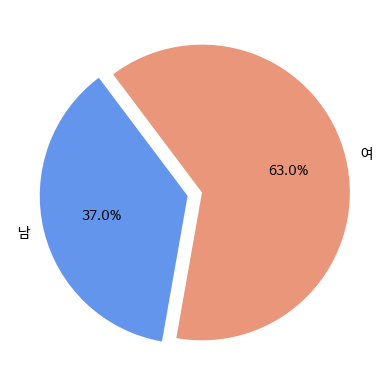

In [ ]:
# 성별 비율 시각화
import matplotlib.pyplot as plt

ratio = [112/303, 191/303]
labels = ['남', '여']
explode = [0.05, 0.05]
colors = ['#6495ED', '#E9967A']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.show()

```
전체 고객의 성별 비율과 큰 차이가 없습니다.
```

In [ ]:
# 가입 기간 확인
du_gp = pd.DataFrame(c3.groupby('가입기간_년')['고객ID'].nunique().reset_index(name = '고객수'))
du_gp

,가입기간_년,고객수
0,1년 이하,69
1,1년 초과 2년 이하,67
2,2년 초과 3년 이하,73
3,3년 초과 4년 이하,82
4,4년 초과,12


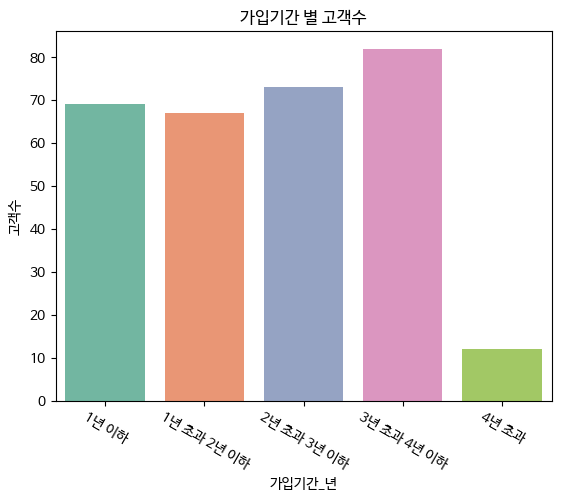

In [ ]:
ax = sns.barplot(du_gp, x = '가입기간_년', y = '고객수', hue = '가입기간_년', palette = 'Set2')
ax.set_title("가입기간 별 고객수")
plt.xticks(rotation = -30);

```
다른 고객군에 비해 1년 이하, 1년 초과 2년 이하의 비율이 낮고 3년 초과 4년 이하의 비율이 약간 높은 양상을 보입니다.
```

In [ ]:
# 쿠폰 사용 여부 확인
cp_gp = pd.DataFrame(c3.groupby('쿠폰상태')['고객ID'].nunique().reset_index(name = '고객수'))
cp_gp

,쿠폰상태,고객수
0,Clicked,303
1,Not Used,295
2,Used,303


```
잠재 우수 고객 모두 쿠폰을 사용한 경험이 있지만 클릭만 하고 사용하지 않은 경우도 존재합니다.
```

In [ ]:
# 거래별 평균 배송료 구하기
cost_gp = pd.DataFrame(c3.groupby(['고객ID', '거래ID'])['배송료'].mean().reset_index(name = '배송료'))

# 고객의 평균 배송료
deli_cost = pd.DataFrame(cost_gp.groupby('고객ID')['배송료'].mean().reset_index(name = '평균배송료'))
deli_cost

,고객ID,평균배송료
0,USER_0006,7.77
1,USER_0013,7.07
2,USER_0018,7.89
3,USER_0024,15.70
4,USER_0026,23.46
...,...,...
298,USER_1434,6.50
299,USER_1440,8.23
300,USER_1442,9.86
301,USER_1444,9.14


In [ ]:
deli_cost.describe()

,평균배송료
count,303.00
mean,9.54
std,5.00
min,5.53
25%,7.02
50%,8.23
75%,9.94
max,56.95


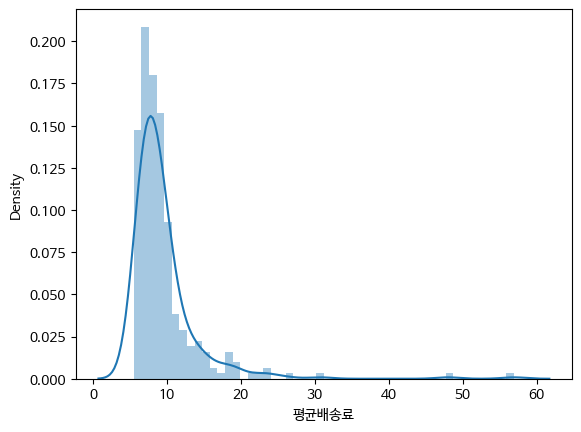

In [ ]:
# 고객별 평균배송료 분포
import seaborn as sns

sns.distplot(deli_cost['평균배송료']);

```
우수 고객과 마찬가지로 주문당 평균배송료 10달러 미만을 지불하는 경우가 많았습니다.
```

## 🔉**Process 3**
### **┗ RFM 분석에 따른 마케팅 전략**  

### **모든 고객군 공통 적용**

---
1. 쿠폰 적용 활성화
- 고객군에 상관 없이 쿠폰을 사용하지 않는 경우가 존재하였고, 쿠폰을 클릭만 하고 적용하지 못한 경우도 많이 나타난 것을 확인하였습니다.

  `Action Plan`   
▶ 최종 결제 이전에 쿠폰 적용 여부를 확인하는 알림창을 띄우거나, 쿠폰 적용 창을 따로 띄우지 않고 바로 쿠폰을 선택하여 적용할 수 있도록 결제창의 수정을 고려해보아야 합니다.

2. 로열티 프로그램 진행  
  `Action Plan`   
▶ 고객군 별로 포인트 적립, 할인, 특별 혜택 등의 인센티브를 적용하여 우수 고객군도 지속적으로 서비스를 적용할 수 있도록 하고, 여러 고객군의 충성도를 확보할 수 있도록 합니다.


### **Enthusiast(휴면 가능성이 있는 잠재 우수 고객)**
---
`Action Plan`  
▶ 거래 주기를 기준으로 신상품 입고 알림을 보냅니다. 9월 ~ 12월에 거래가 이루어지지 않은 것으로 보아 이 시기에 방문할 수 있도록 알림을 보냅니다.  
  - 해당 고객군의 경우 우수 고객으로 올라갈 수 있는 잠재성이 있는 만큼 구매 흥미를 모을 수 있는 전략을 모색해야합니다.
  - 새로운 브랜드 혹은 신상 입고 알림과 함께 프로모션을 진행하여 방문 및 구매를 유도합니다.


▶  하반기에 이루어지는 프로모션 알림을 통해 하반기에도 방문할 수 있도록 유도합니다.


### **Potential(잡아야 할 고객)**
---
`Action Plan`   
▶ 거래 기록에 따른 상품 추천 혹은 현재 우리 서비스의 인기 제품을 방문 첫 화면에 띄웁니다.
  - 최근에 방문했지만 구매 빈도나 구매 금액이 낮은 경우 필요한 제품을 잘 찾지 못하거나 어떤 제품을 구매할지 고민할 가능성을 대비하여 방문 첫 화면에 고객이 관심을 가질만한 제품을 배치하여 구매를 유도합니다.   

▶ 포토 리뷰나 리뷰 선정 이벤트를 통해 구매를 유도합니다.
  - 제품에 대한 구매 리뷰 이벤트를 통해 구매를 유도하고, 이벤트를 통한 적립금 혹은 할인 프로모션 진행으로 다음 방문 시 재구매를 유도합니다.

### **Lost(이탈 우려 고객)**

---
`Action Plan`  
▶ 첫 구매 이후 한 달이 경과하여 거래기록이 없는 고객을 대상으로 재방문할 시 배송료 할인 혹은 깜짝 할인 프로모션 진행
  - 첫 방문 이후 구매가 이루어지지 않은 고객이 많습니다. 이 고객을 대상으로 재방문 및 구매를 유도하기 위한 프로모션을 진행해볼 수 있습니다.  

▶ 우수 고객과 가장 많이 구매한 제품의 차이가 약간 존재하는 것으로 보입니다. 자주 방문하는 고객은 주로 어떤 제품을 구매하는지 추천하거나 이전에 구매한 기준으로 비슷한 제품을 추천하여 구매를 유도해봅니다.

▶ 9월부터 이탈한 고객이 많은 것으로 보입니다. 핼러윈이나 가을 시즌에 구매를 유도할 수 있는 프로모션 기획이 필요할 것 같습니다.
